# **Data Wrangling**

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
kashti = sns.load_dataset('titanic')
ks1 = kashti 
ks2 = kashti 


In [4]:
kashti.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
(kashti['age']+1).head(10)

0    23.0
1    39.0
2    27.0
3    36.0
4    36.0
5     NaN
6    55.0
7     3.0
8    28.0
9    15.0
Name: age, dtype: float64

## **Dealing with the missing Values** 
> - In a data set missing values are N/A, NAN,\ or zero
> - Remove the missing value variable 
> - Replace the missing Value : 
>   1. How?
>       - Average Accuray
>       - Frequency or mode replacement 
>       - Replace Based on other functions 
>       - ML Algos can also used 
>       - Ignore the missing Values
>   2. Why? 
>       - to avoid data loss
>       - Less accurate 

In [6]:
# where exactly missing values are
kashti.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
kashti.shape

(891, 16)

In [8]:
# To drop the NaN values 
kashti.dropna(subset=['deck'],axis=0, inplace=True)

In [9]:
kashti.isnull().sum()

Unnamed: 0      0
survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [10]:
# Remove all the missing values as whole
kashti.dropna()
kashti.dropna().isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [11]:
kashti.shape

(203, 16)

In [12]:
ks1.isnull().sum()

Unnamed: 0      0
survived        0
pclass          0
sex             0
age            19
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck            0
embark_town     2
alive           0
alone           0
dtype: int64

In [13]:
mean = ks1['age'].mean()

In [14]:
# Replacing the missing values with the mean
ks1['age'] = ks1['age'].replace(np.nan, mean)

In [15]:
ks1.dropna(subset=['deck'],axis=0, inplace=True)

In [16]:
ks1.dropna(subset=['embarked'],axis=0, inplace=True)

In [17]:
ks1.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
ks1.shape

(201, 16)

## **Data Formating** 
> - Easy to gather 
> - Easy to understand

In [19]:
ks1.dtypes

Unnamed: 0        int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
ks1['survived'] = ks1['survived'].astype('float64')
ks1.dtypes

Unnamed: 0        int64
survived        float64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [21]:
# convert the age into days
ks1['age'] = ks1['age']*356

In [22]:
ks1.head(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1.0,1,female,13528.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,3,1.0,1,female,12460.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,6,0.0,1,male,19224.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,10,1.0,3,female,1424.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,11,1.0,1,female,20648.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [23]:
ks1.rename(columns={"age": "age in days"}, inplace=True)
ks1.head(5)

,Unnamed: 0,survived,pclass,sex,age in days,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1.0,1,female,13528.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,3,1.0,1,female,12460.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,6,0.0,1,male,19224.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,10,1.0,3,female,1424.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,11,1.0,1,female,20648.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


## **Data Normalization**
- Make the data Uniform 
- Make sure that the whole data have the same impact 
- Aik Machli smandar me or ek Jar me 
- To minimize the computaional complexity 

In [24]:
ks3 = ks1[['age in days', 'fare']]
ks3.head(5)

,age in days,fare
1,13528.0,71.2833
3,12460.0,53.1000
6,19224.0,51.8625
10,1424.0,16.7000
11,20648.0,26.5500


In [25]:
ks3['fare'] = ks3['fare']/ks3['fare'].max()
ks3.head()

C:\Users\Sartaj\AppData\Local\Temp\ipykernel_9924\239786220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks3['fare'] = ks3['fare']/ks3['fare'].max()


,age in days,fare
1,13528.0,0.139136
3,12460.0,0.103644
6,19224.0,0.101229
10,1424.0,0.032596
11,20648.0,0.051822


In [26]:
# Simple feature scaling
ks3['age in days'] = ks3['age in days']/ks3['age in days'].max()
ks3.head()

C:\Users\Sartaj\AppData\Local\Temp\ipykernel_9924\4274444637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks3['age in days'] = ks3['age in days']/ks3['age in days'].max()


,age in days,fare
1,0.4750,0.139136
3,0.4375,0.103644
6,0.6750,0.101229
10,0.0500,0.032596
11,0.7250,0.051822


In [27]:
# mean max method
ks3['fare'] = (ks3['fare']-ks3['fare'].min())/(ks3['fare'].max()-ks3['fare'].min())
ks3.head()

C:\Users\Sartaj\AppData\Local\Temp\ipykernel_9924\2673459693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks3['fare'] = (ks3['fare']-ks3['fare'].min())/(ks3['fare'].max()-ks3['fare'].min())


,age in days,fare
1,0.4750,0.139136
3,0.4375,0.103644
6,0.6750,0.101229
10,0.0500,0.032596
11,0.7250,0.051822


In [28]:
# z_score
ks3['fare'] = (ks3['fare']-ks3['fare'].mean())/ks3['fare'].std()
ks3.head()

C:\Users\Sartaj\AppData\Local\Temp\ipykernel_9924\130998099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ks3['fare'] = (ks3['fare']-ks3['fare'].mean())/ks3['fare'].std()


,age in days,fare
1,0.4750,-0.067057
3,0.4375,-0.309853
6,0.6750,-0.326377
10,0.0500,-0.795891
11,0.7250,-0.664367


In [29]:
# Log transformation 
ks = sns.load_dataset('titanic')
ks.head(5)


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
ks['fare'] = np.log(ks['fare'])
ks.head()

C:\Users\Sartaj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,1.981001,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,2.070022,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,2.085672,S,Third,man,True,NaN,Southampton,no,True


In [31]:
ks.tail(5)

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,2.564949,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,3.401197,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,3.154870,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,3.401197,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,2.047693,Q,Third,man,True,NaN,Queenstown,no,True


In [32]:
min(ks['age'])

0.42

In [33]:
max(ks['age'])

80.0

In [34]:
ks = ks.dropna()

In [35]:
k = sns.load_dataset('titanic')
k = k.dropna()

In [36]:
k.tail()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
871,871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [37]:
k['age']

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 182, dtype: float64

In [38]:
# Binning 
k['age'] = pd.cut(k['age'].astype(int),5)
k['age']

1       (32.0, 48.0]
3       (32.0, 48.0]
6       (48.0, 64.0]
10     (-0.08, 16.0]
11      (48.0, 64.0]
           ...      
871     (32.0, 48.0]
872     (32.0, 48.0]
879     (48.0, 64.0]
887     (16.0, 32.0]
889     (16.0, 32.0]
Name: age, Length: 182, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [39]:
k['fare'] = pd.cut(k['fare'].astype(int),5)
k['fare']

1      (-0.512, 102.4]
3      (-0.512, 102.4]
6      (-0.512, 102.4]
10     (-0.512, 102.4]
11     (-0.512, 102.4]
            ...       
871    (-0.512, 102.4]
872    (-0.512, 102.4]
879    (-0.512, 102.4]
887    (-0.512, 102.4]
889    (-0.512, 102.4]
Name: fare, Length: 182, dtype: category
Categories (5, interval[float64]): [(-0.512, 102.4] < (102.4, 204.8] < (204.8, 307.2] < (307.2, 409.6] < (409.6, 512.0]]

In [40]:
pd.get_dummies(ks['sex'])
ks.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,1,female,38.0,1,0,4.266662,C,First,woman,False,C,Cherbourg,yes,False
3,3,1,1,female,35.0,1,0,3.972177,S,First,woman,False,C,Southampton,yes,False
6,6,0,1,male,54.0,0,0,3.948596,S,First,man,True,E,Southampton,no,True
10,10,1,3,female,4.0,1,1,2.815409,S,Third,child,False,G,Southampton,yes,False
11,11,1,1,female,58.0,0,0,3.279030,S,First,woman,False,C,Southampton,yes,True


In [41]:
dum = pd.get_dummies(ks['sex'])
dum

,female,male
1,1,0
3,1,0
6,0,1
10,1,0
11,1,0
...,...,...
871,1,0
872,0,1
879,1,0
887,1,0


In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 


In [13]:
df=pd.read_csv('newtrain1.csv')

In [14]:
df.head()

,origin,destination,airline,refundable,baggage_weight,baggage_pieces,flight_number,purchace_date,departure_date,arival_date,purchace_time,departure_time,arival_time
0,0,1,gamma,1,0.000000,0,c-2,2020-12-31,2021-01-10,2021-01-10,09:46:17.463002,05:00:00,07:00:00
1,0,1,gamma,1,0.711111,1,c-2,2020-12-31,2021-01-10,2021-01-10,09:46:17.463002,05:00:00,07:00:00
2,0,1,gamma,1,0.711111,1,c-4,2020-12-31,2021-01-10,2021-01-10,09:46:17.463002,11:00:00,13:00:00
3,0,1,gamma,1,0.711111,2,c-4,2020-12-31,2021-01-10,2021-01-10,09:46:17.463002,11:00:00,13:00:00
4,0,1,beta,0,0.444444,0,b-69,2020-12-31,2021-01-25,2021-01-25,09:46:18.191119,11:00:00,12:55:00


In [6]:
df.tail()

,origin,destination,airline,refundable,baggage_weight,baggage_pieces,flight_number,purchace_date,departure_date,arival_date,purchace_time,departure_time,arival_time
21776585,0,1,alpha,1,0.444444,1,a-7,2021-08-31,2021-09-03,2021-09-03,23:29:18.122593,10:00:00,12:00:00
21776586,0,1,alpha,1,0.333333,1,a-9,2021-08-31,2021-09-03,2021-09-03,23:29:18.122593,13:40:00,15:40:00
21776587,0,1,omega,1,0.444444,1,d-1,2021-08-31,2021-09-03,2021-09-03,23:29:18.961691,04:40:00,06:40:00
21776588,0,1,omega,1,0.444444,1,d-3,2021-08-31,2021-09-03,2021-09-03,23:29:18.961691,10:35:00,12:35:00
21776589,0,1,omega,1,0.444444,1,d-5,2021-08-31,2021-09-03,2021-09-03,23:29:18.961691,17:05:00,19:05:00


In [15]:
df[['purchase_time','n']]=df['purchace_time'].str.split('.', expand=True)
df.drop('n', inplace=True, axis=1)
df.drop('purchace_time', inplace=True, axis=1)

In [16]:
df['origin'] = df['origin'].replace(0,'x')
df['destination'] = df['destination'].replace(1,'y')

In [17]:
df.head()

,origin,destination,airline,refundable,baggage_weight,baggage_pieces,flight_number,purchace_date,departure_date,arival_date,departure_time,arival_time,purchase_time
0,x,y,gamma,1,0.000000,0,c-2,2020-12-31,2021-01-10,2021-01-10,05:00:00,07:00:00,09:46:17
1,x,y,gamma,1,0.711111,1,c-2,2020-12-31,2021-01-10,2021-01-10,05:00:00,07:00:00,09:46:17
2,x,y,gamma,1,0.711111,1,c-4,2020-12-31,2021-01-10,2021-01-10,11:00:00,13:00:00,09:46:17
3,x,y,gamma,1,0.711111,2,c-4,2020-12-31,2021-01-10,2021-01-10,11:00:00,13:00:00,09:46:17
4,x,y,beta,0,0.444444,0,b-69,2020-12-31,2021-01-25,2021-01-25,11:00:00,12:55:00,09:46:18


In [18]:
df.to_csv("Train.csv",index=False)

In [19]:
df1 = df.sample(n=30000)

In [20]:
df1.to_csv("sample_30000.csv",index=False)

time_cols = ['purchase_time','departure_time','arival_time']
date_cols = ['purchace_date','departure_date','arival_date']

for col in date_cols:
    df['{}_month'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.month
    df['{}_day'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.day
    df['{}_year'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.year

for col in time_cols:
    df['{}_hour'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%H:%M:%S').dt.hour
    df['{}_minutes'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%H:%M:%S').dt.minute
    

In [21]:
df.head()

,origin,destination,airline,refundable,baggage_weight,baggage_pieces,flight_number,purchace_date,departure_date,arival_date,departure_time,arival_time,purchase_time
0,x,y,gamma,1,0.000000,0,c-2,2020-12-31,2021-01-10,2021-01-10,05:00:00,07:00:00,09:46:17
1,x,y,gamma,1,0.711111,1,c-2,2020-12-31,2021-01-10,2021-01-10,05:00:00,07:00:00,09:46:17
2,x,y,gamma,1,0.711111,1,c-4,2020-12-31,2021-01-10,2021-01-10,11:00:00,13:00:00,09:46:17
3,x,y,gamma,1,0.711111,2,c-4,2020-12-31,2021-01-10,2021-01-10,11:00:00,13:00:00,09:46:17
4,x,y,beta,0,0.444444,0,b-69,2020-12-31,2021-01-25,2021-01-25,11:00:00,12:55:00,09:46:18


In [23]:
time_cols = ['purchase_time','departure_time','arival_time']
date_cols = ['purchace_date','departure_date','arival_date']

for col in date_cols:
    df['{}_month'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.month
    df['{}_day'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.day
    df['{}_year'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%Y-%m-%d').dt.year

for col in time_cols:
    df['{}_hour'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%H:%M:%S').dt.hour
    df['{}_minutes'.format(col)] =  pd.to_datetime(df['{}'.format(col)],format='%H:%M:%S').dt.minute

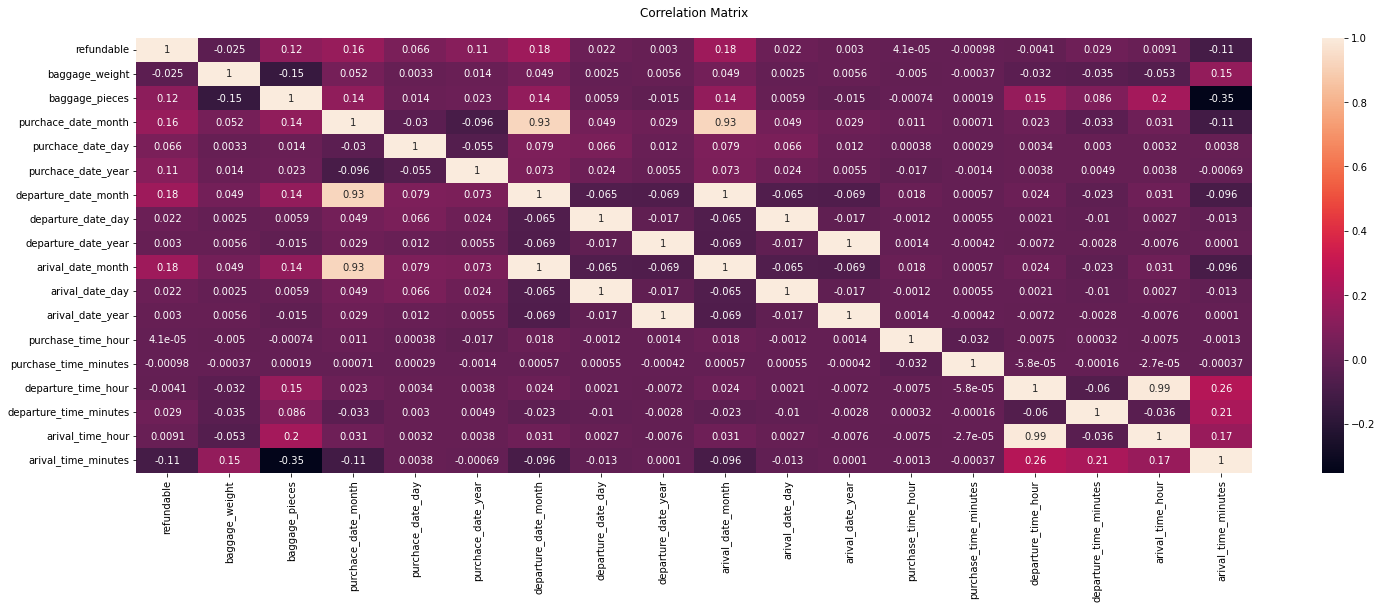

In [24]:
plt.figure(figsize=(25,8))
plt.title('Correlation Matrix\n')
sns.heatmap(df.corr(),annot=True)
plt.show()

In [26]:
df1 = pd.read_csv("sample_30000.csv")

In [28]:
time_cols = ['purchase_time','departure_time','arival_time']
date_cols = ['purchace_date','departure_date','arival_date']

for col in date_cols:
    df1['{}_month'.format(col)] =  pd.to_datetime(df1['{}'.format(col)],format='%Y-%m-%d').dt.month
    df1['{}_day'.format(col)] =  pd.to_datetime(df1['{}'.format(col)],format='%Y-%m-%d').dt.day
    df1['{}_year'.format(col)] =  pd.to_datetime(df1['{}'.format(col)],format='%Y-%m-%d').dt.year

for col in time_cols:
    df1['{}_hour'.format(col)] =  pd.to_datetime(df1['{}'.format(col)],format='%H:%M:%S').dt.hour
    df1['{}_minutes'.format(col)] =  pd.to_datetime(df1['{}'.format(col)],format='%H:%M:%S').dt.minute

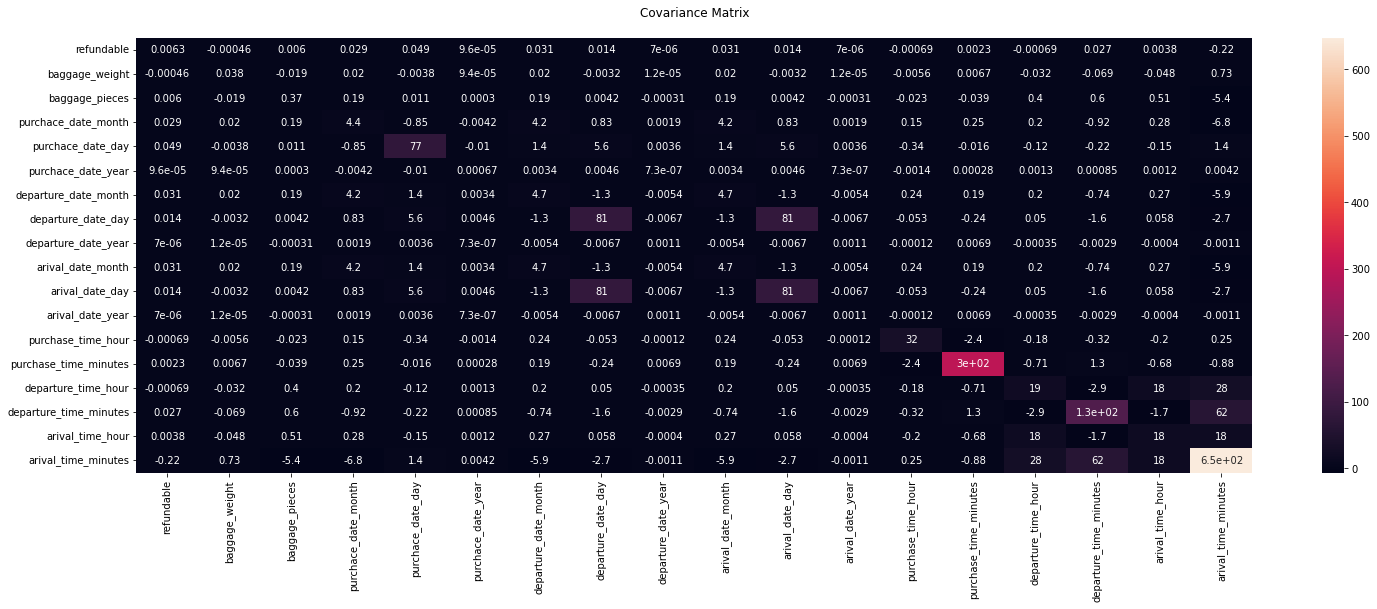

In [29]:
plt.figure(figsize=(25,8))
plt.title('Covariance Matrix\n')
sns.heatmap(df1.cov(),annot=True)
plt.show()

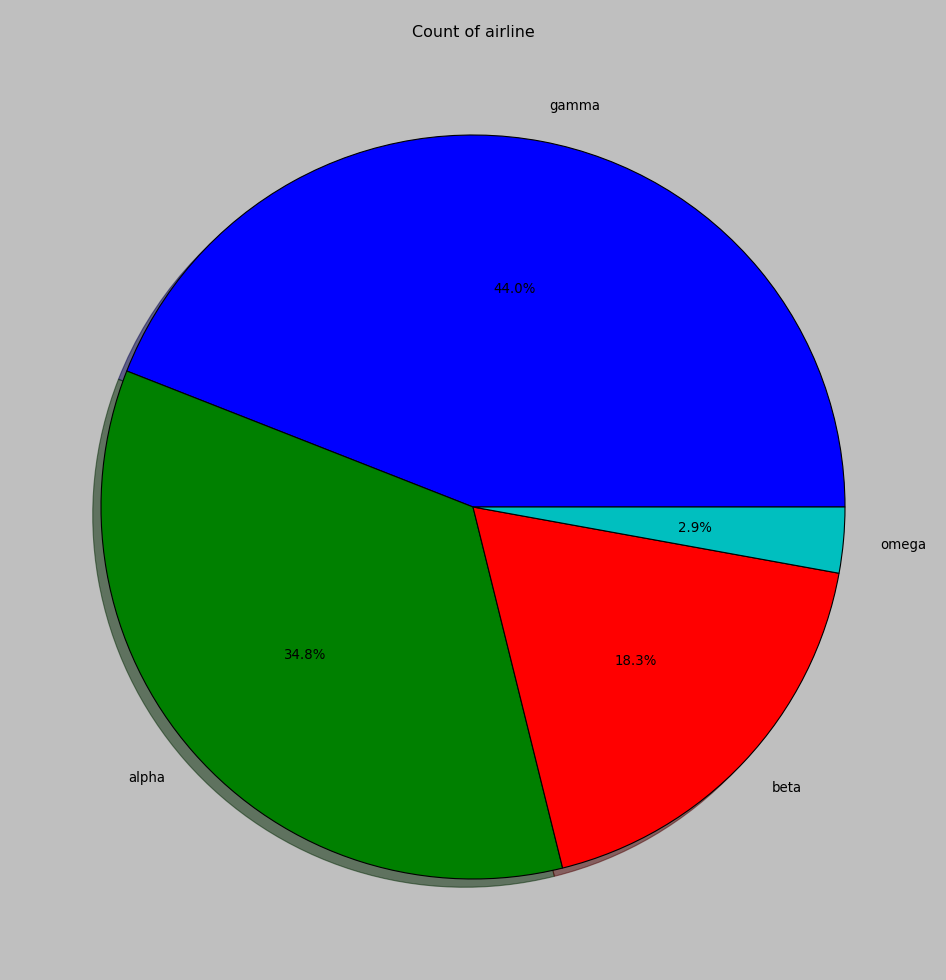

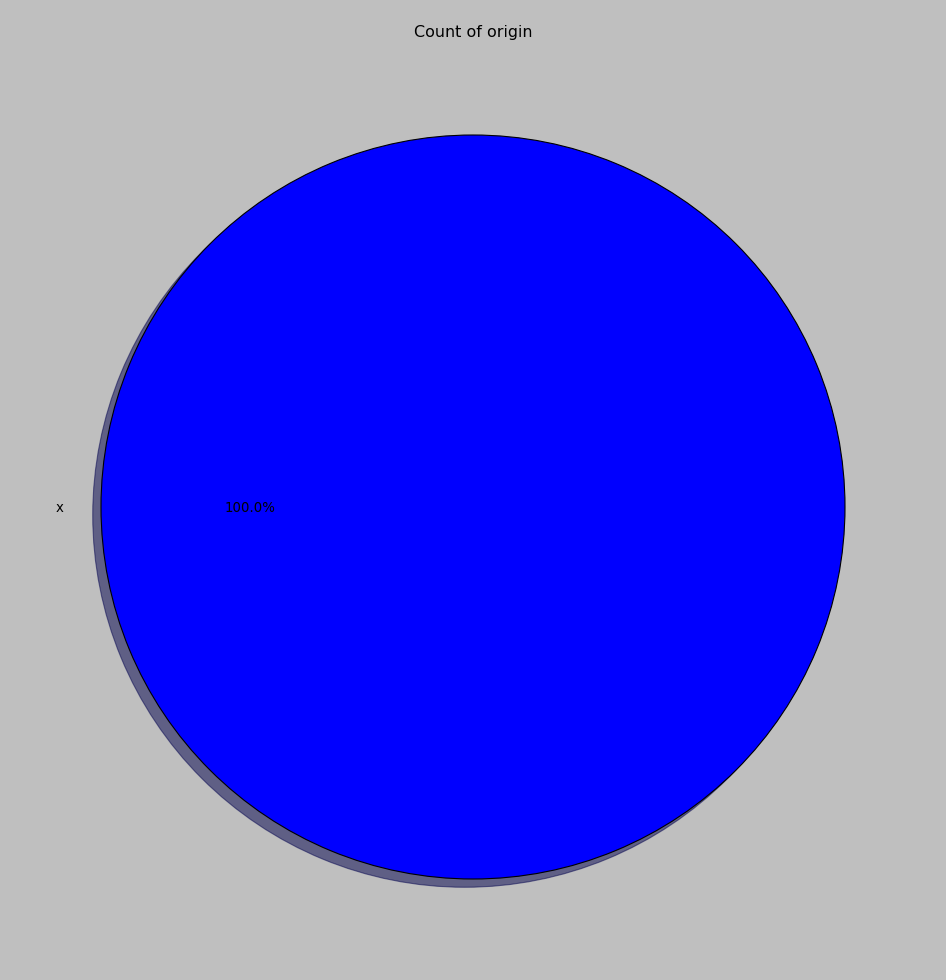

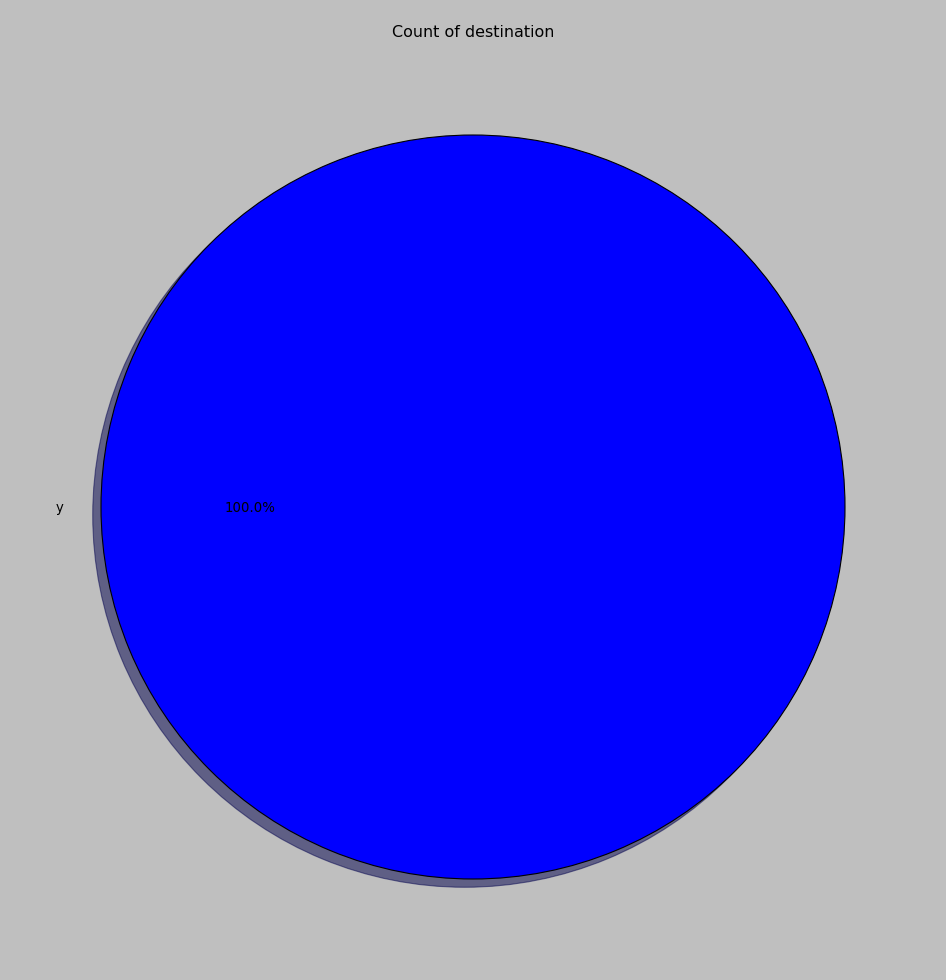

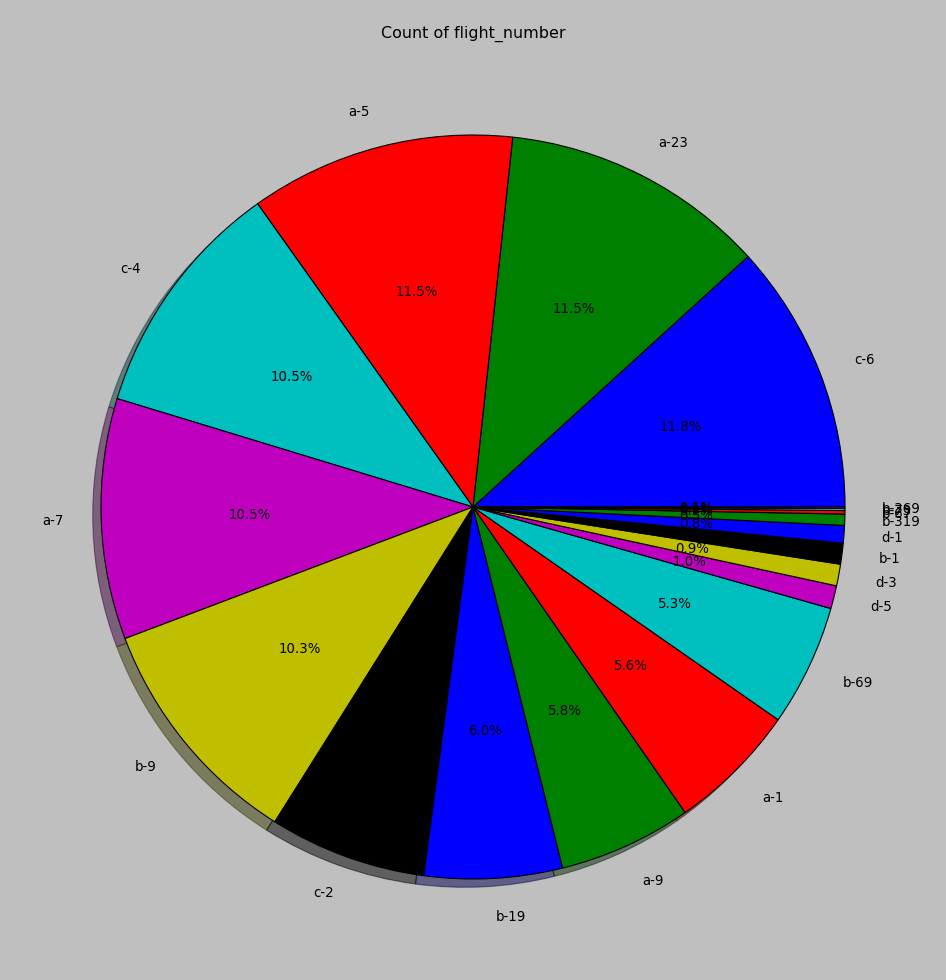

In [30]:
for col in ['airline','origin', 'destination','flight_number']:
    plt.style.use('classic')
    plt.figure(figsize=(15,15))
    plt.pie(df1[col].value_counts(),labels=df1[col].unique(),shadow=True,autopct='%0.1f%%')
    plt.title('\nCount of {}'.format(col))
    plt.show()

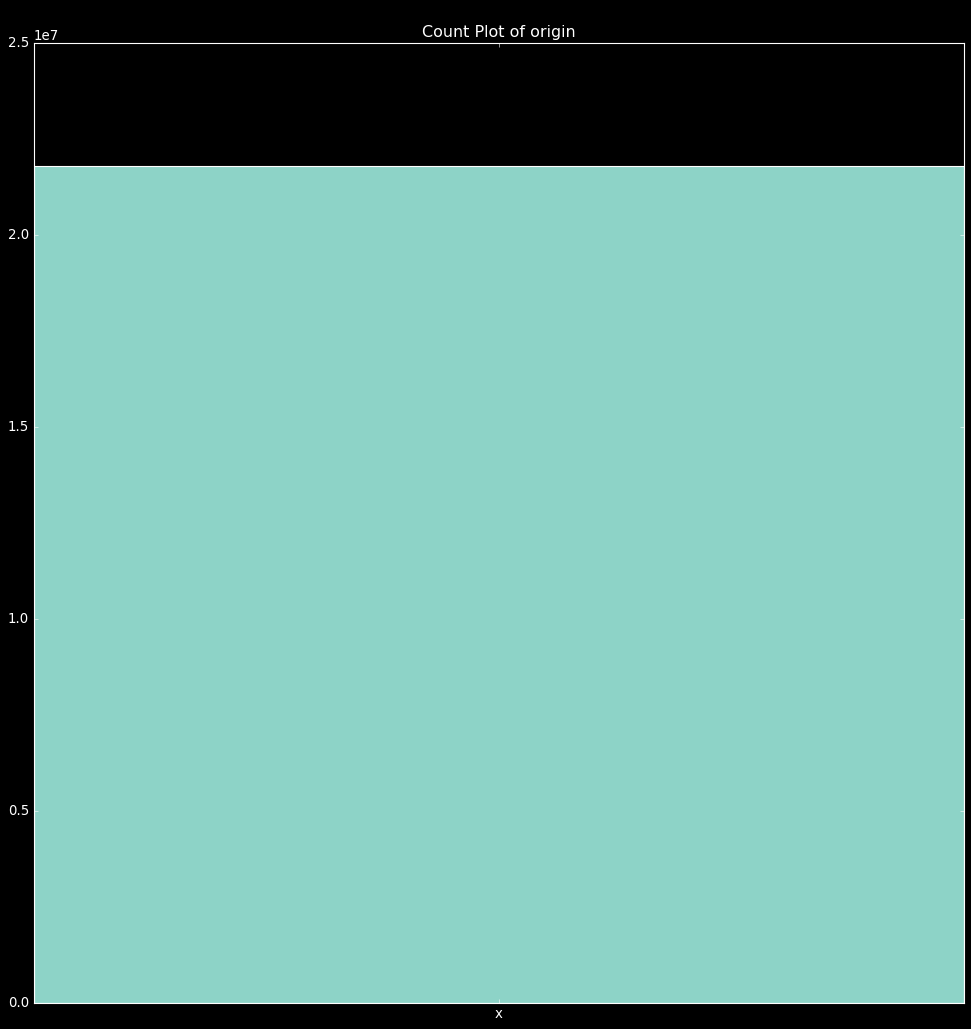

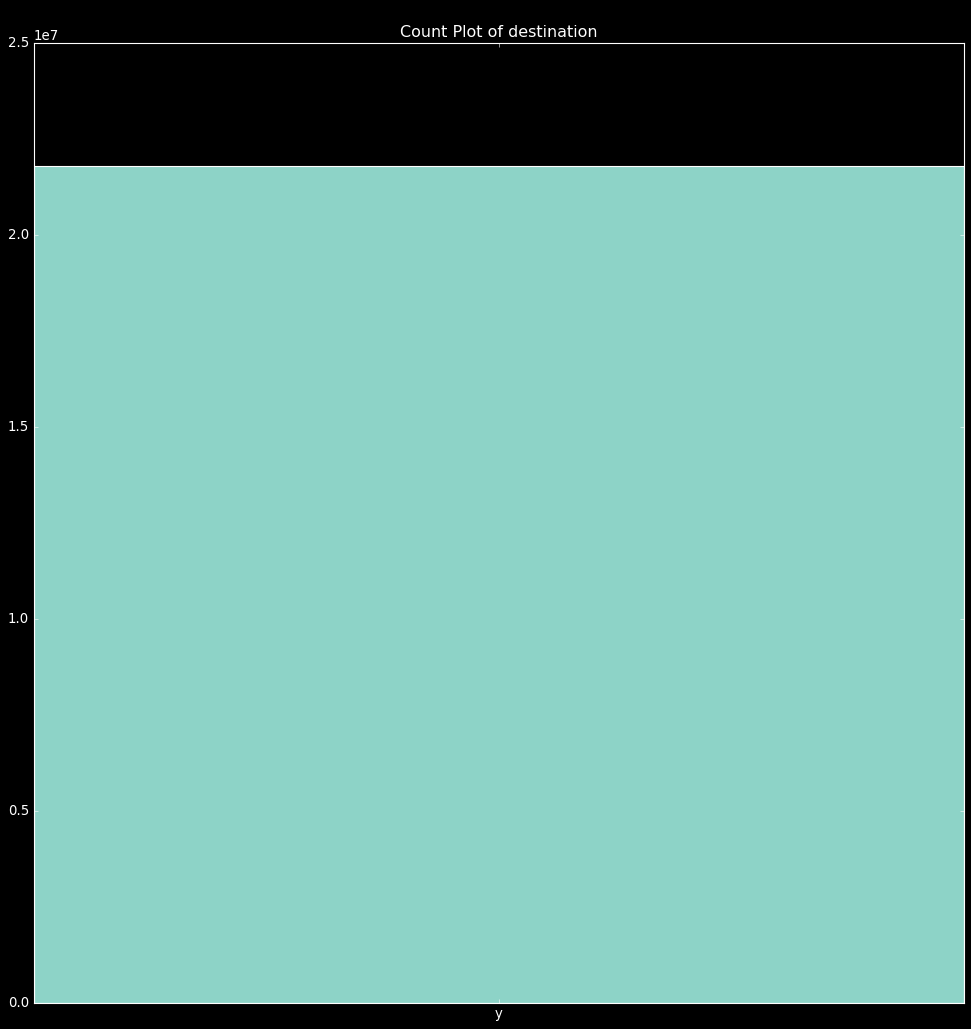

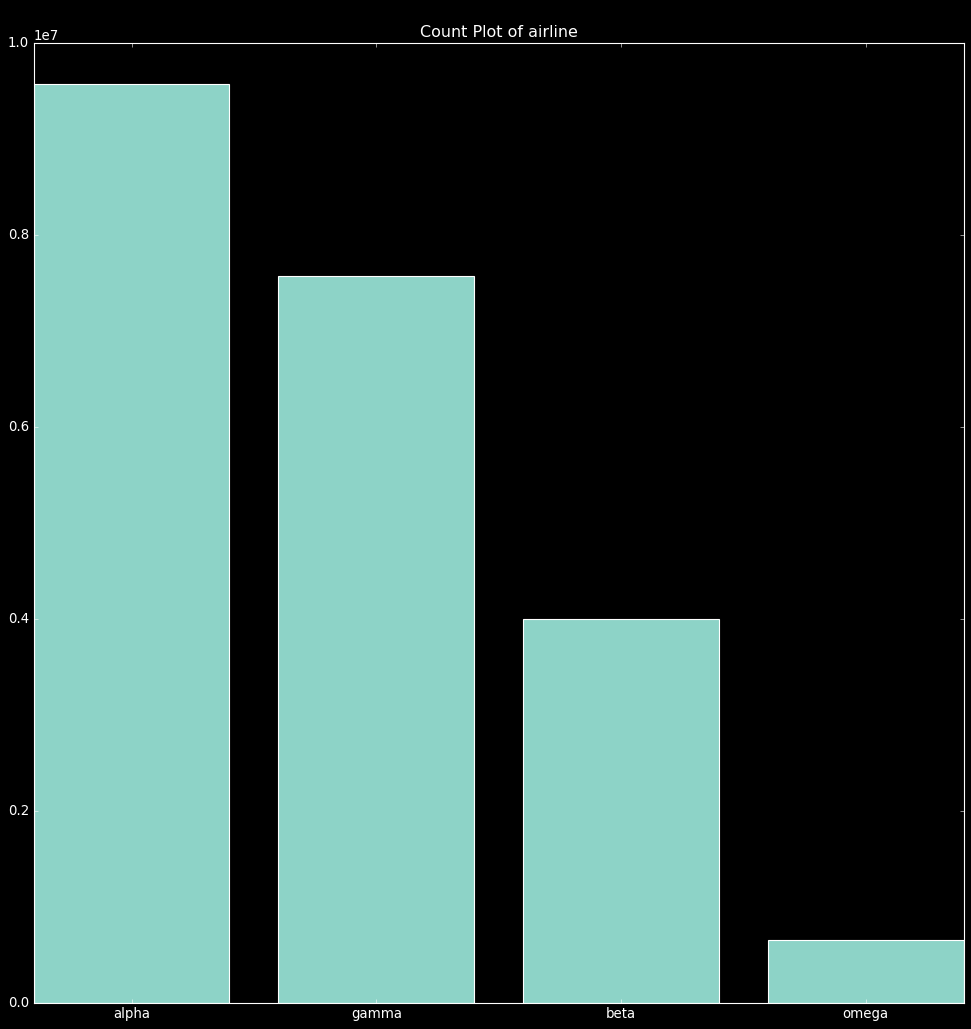

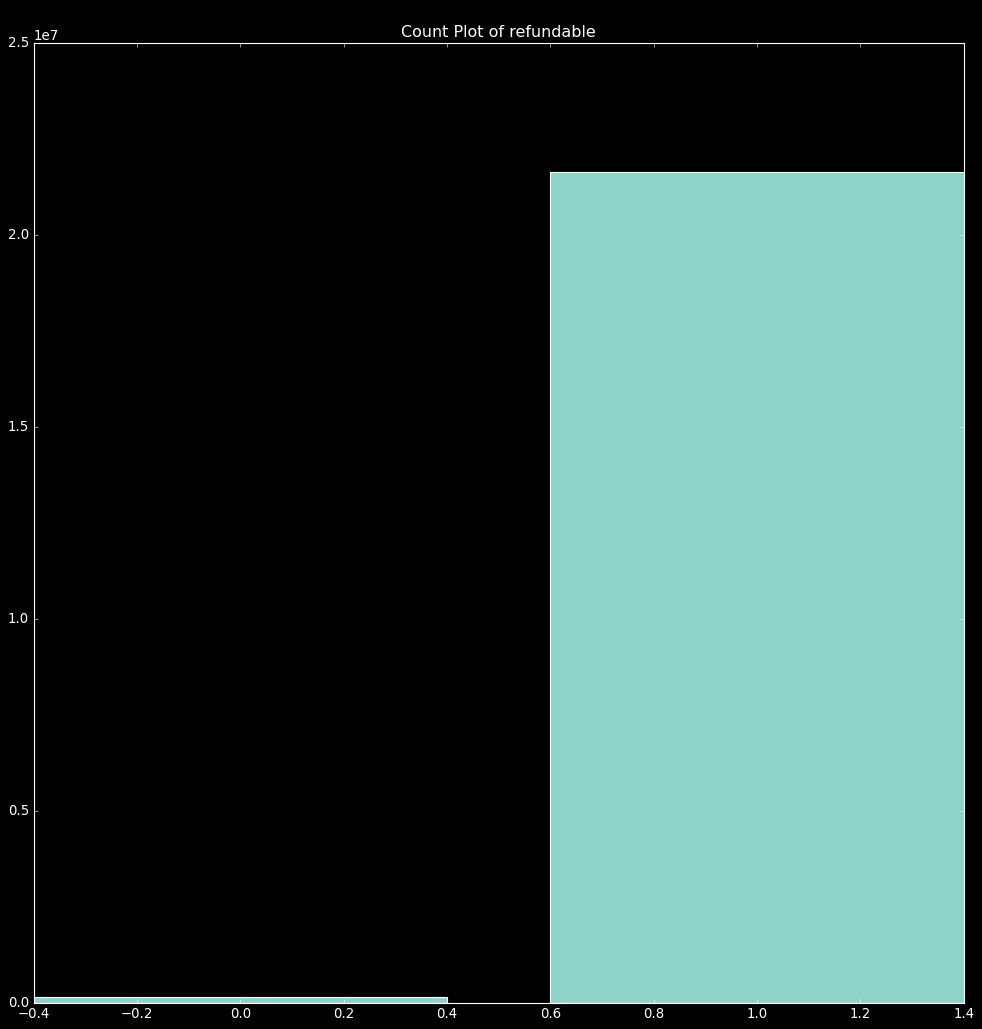

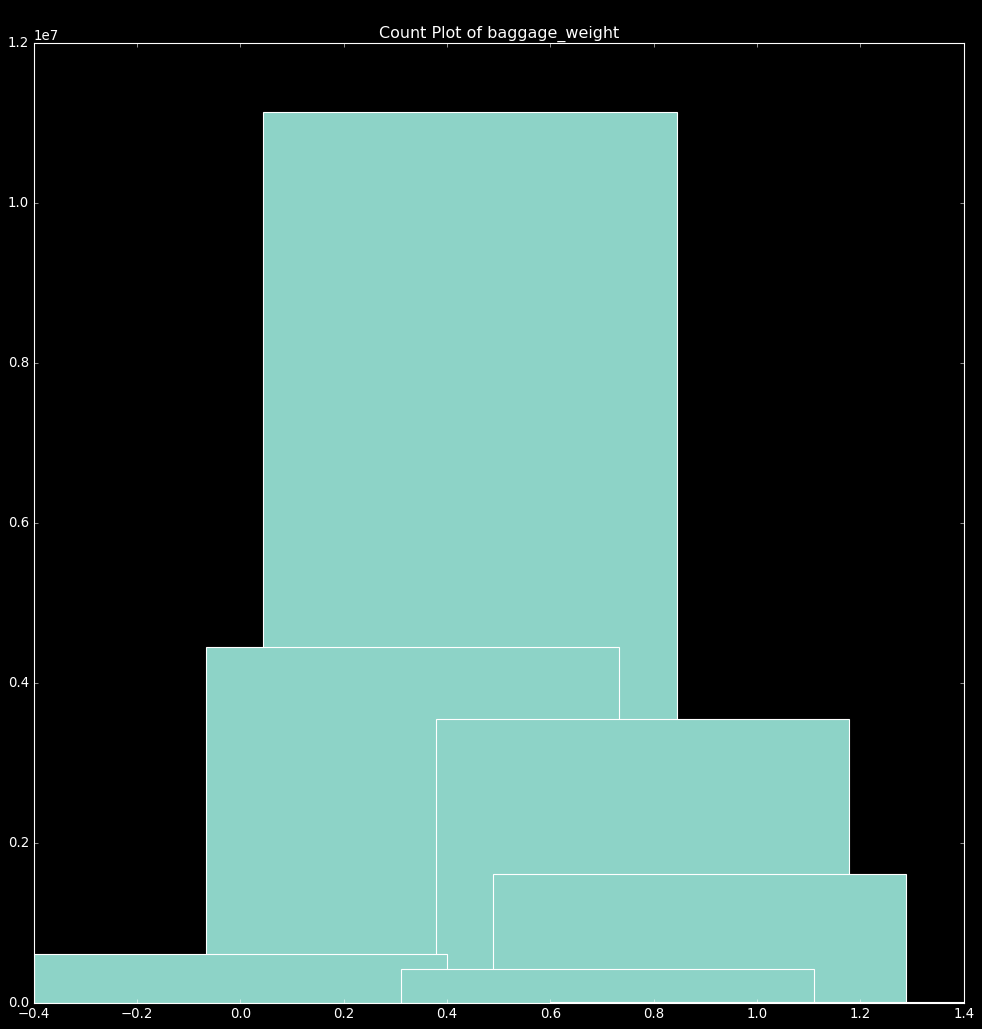

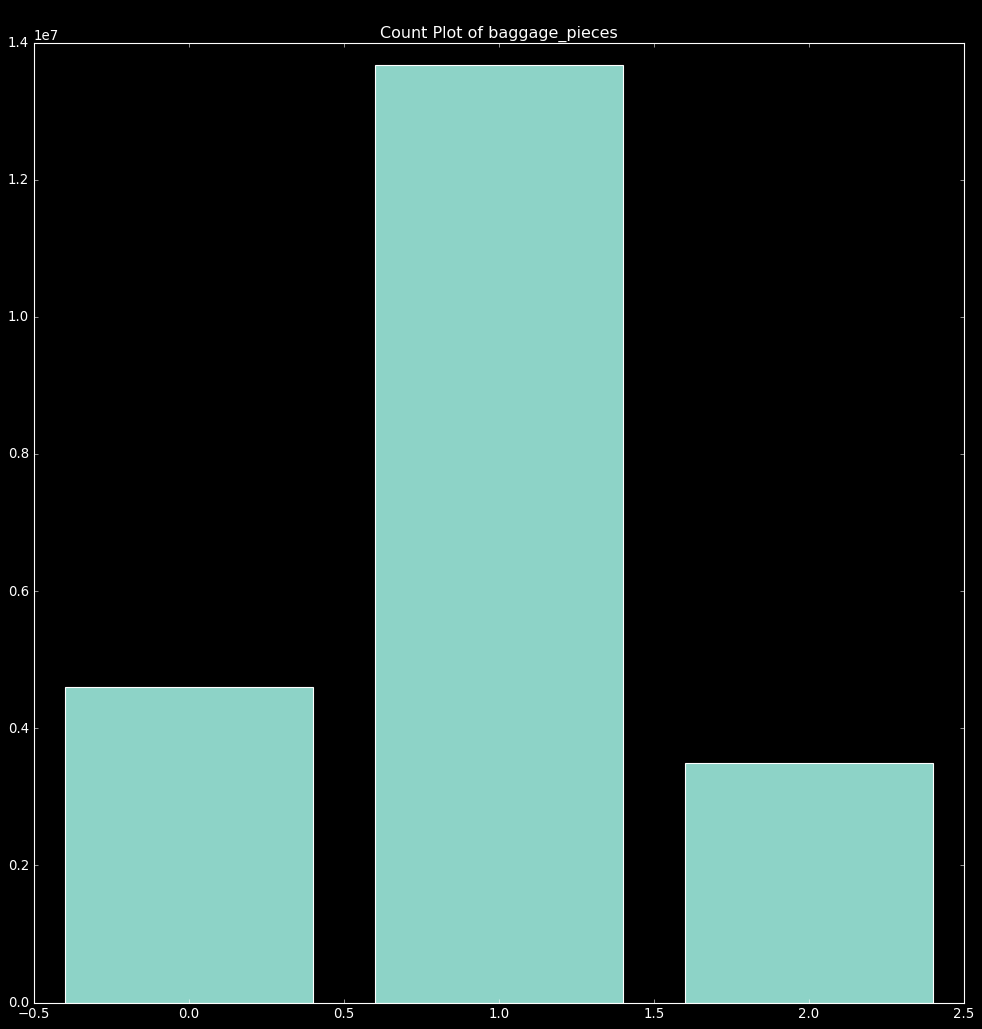

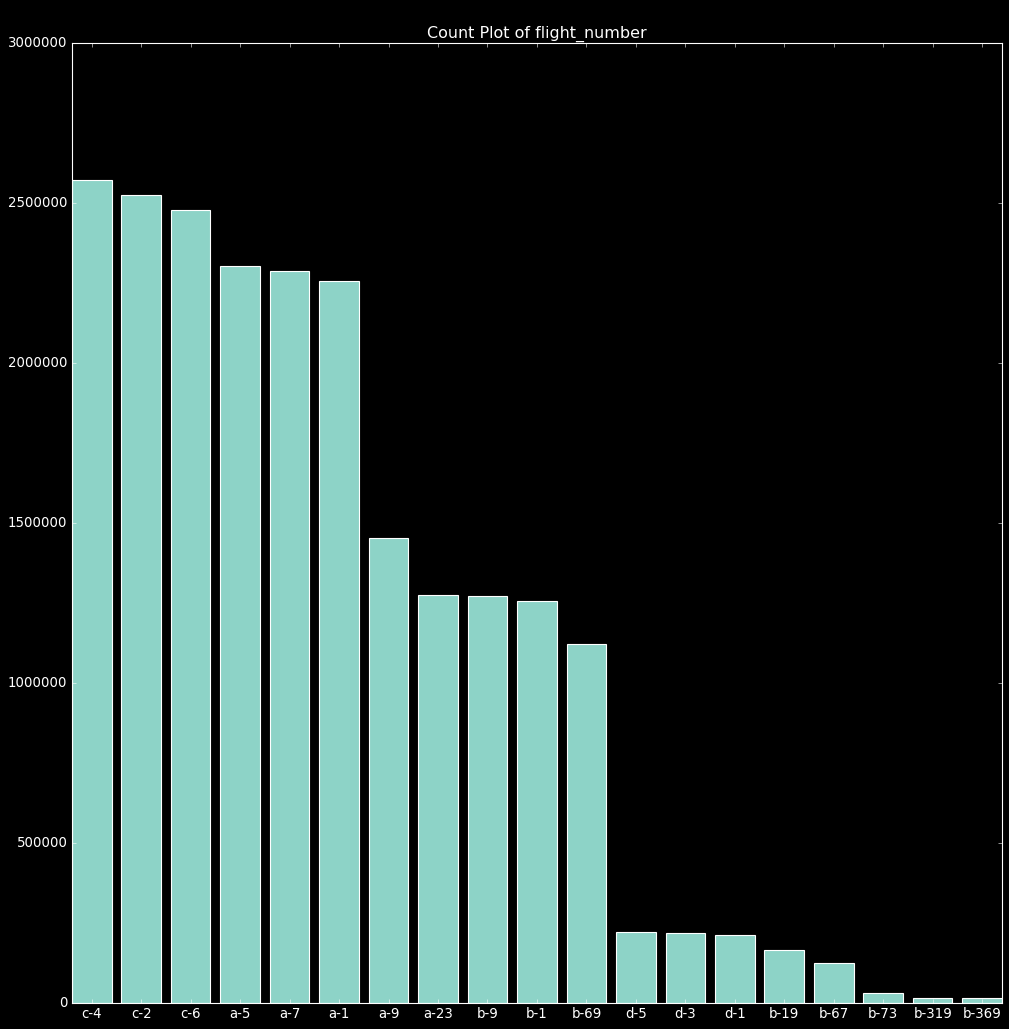

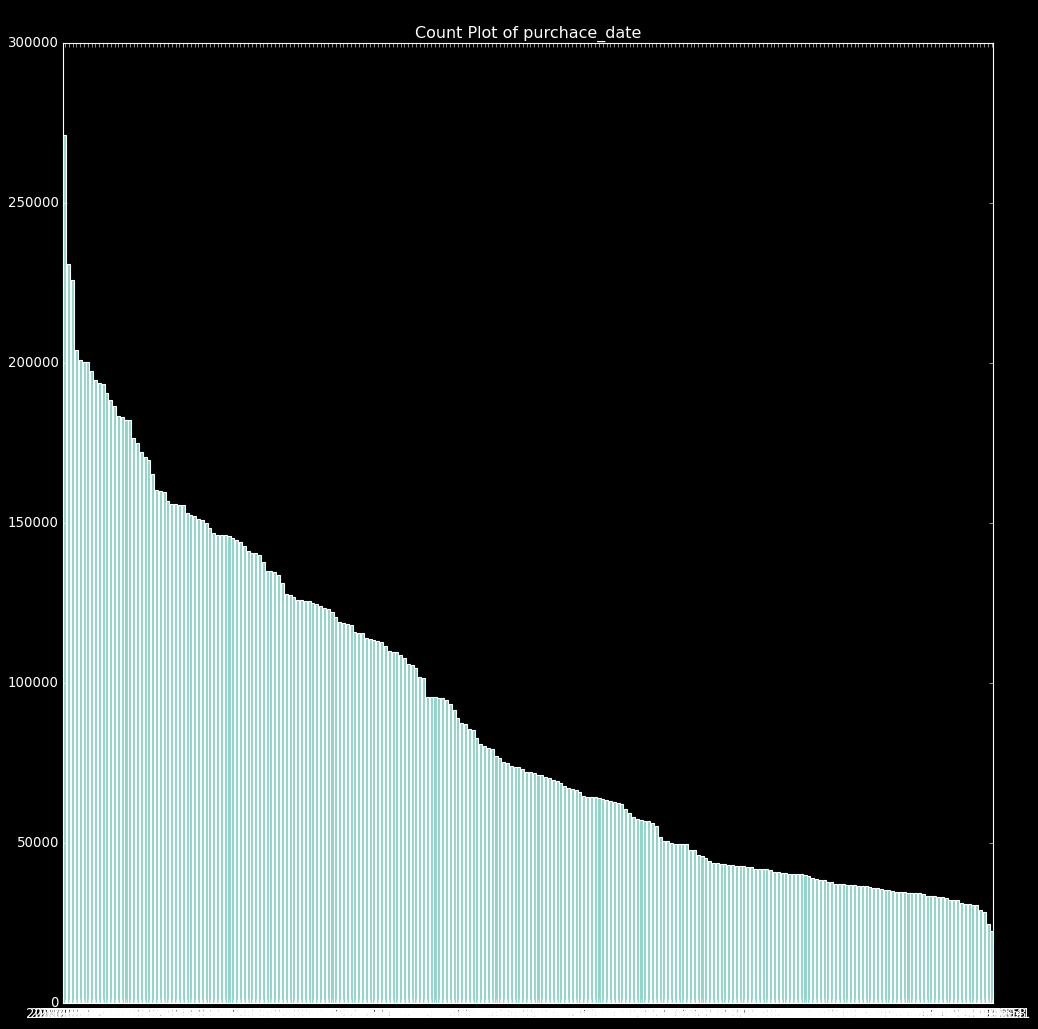

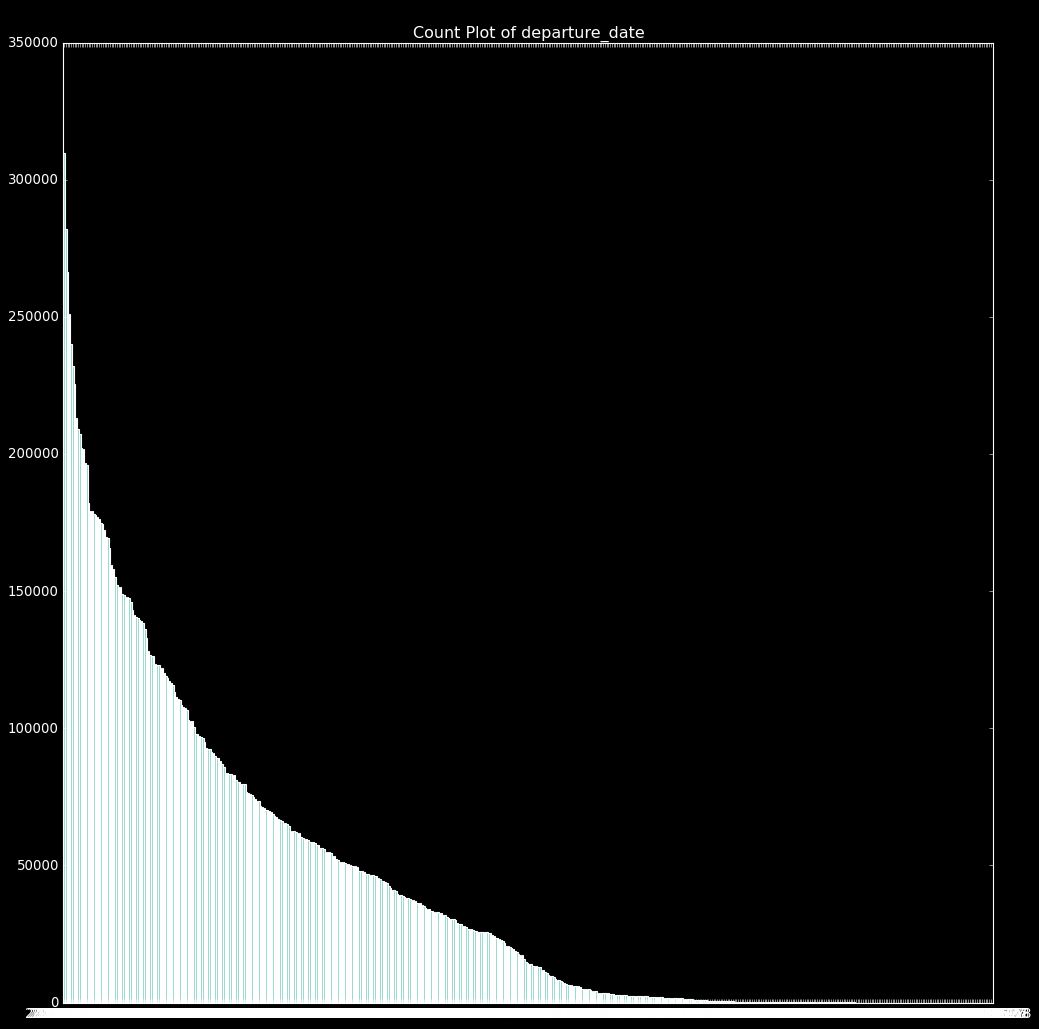

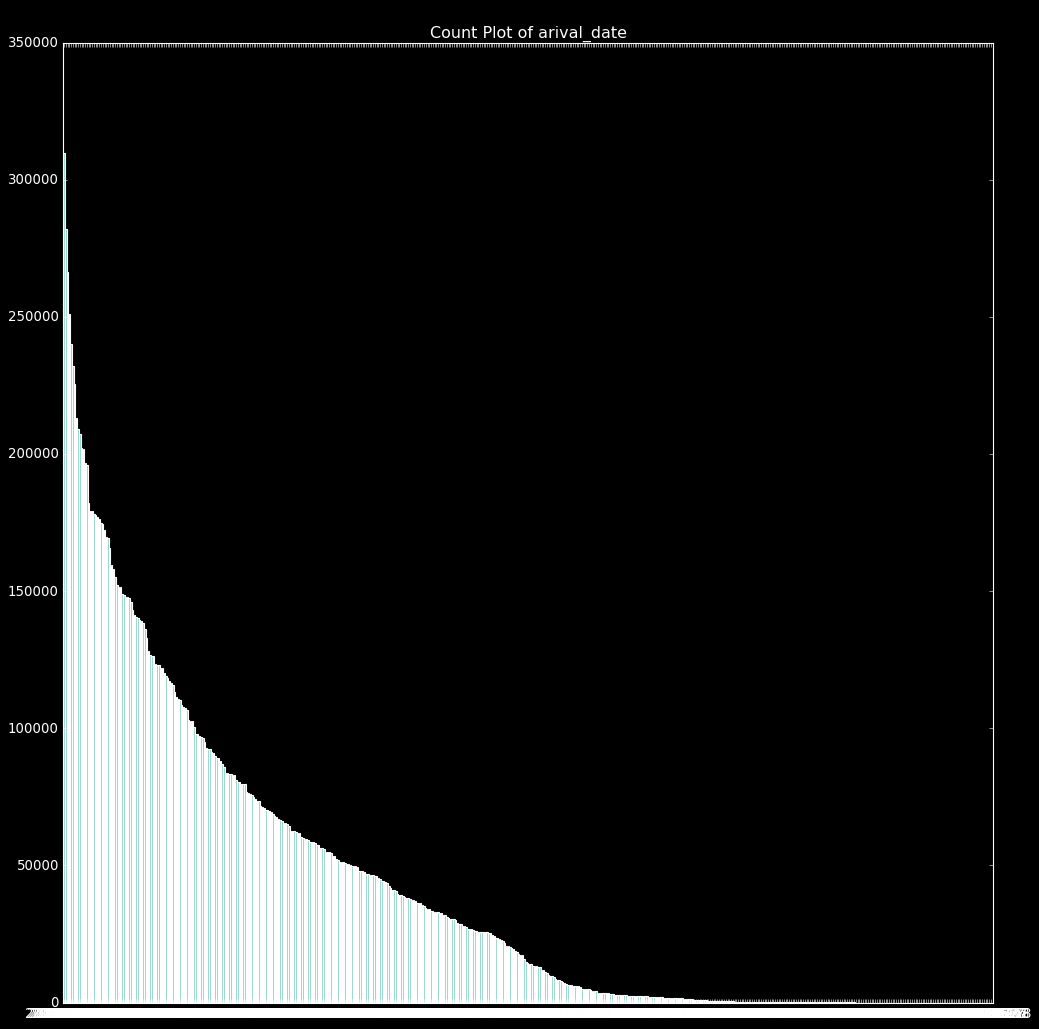

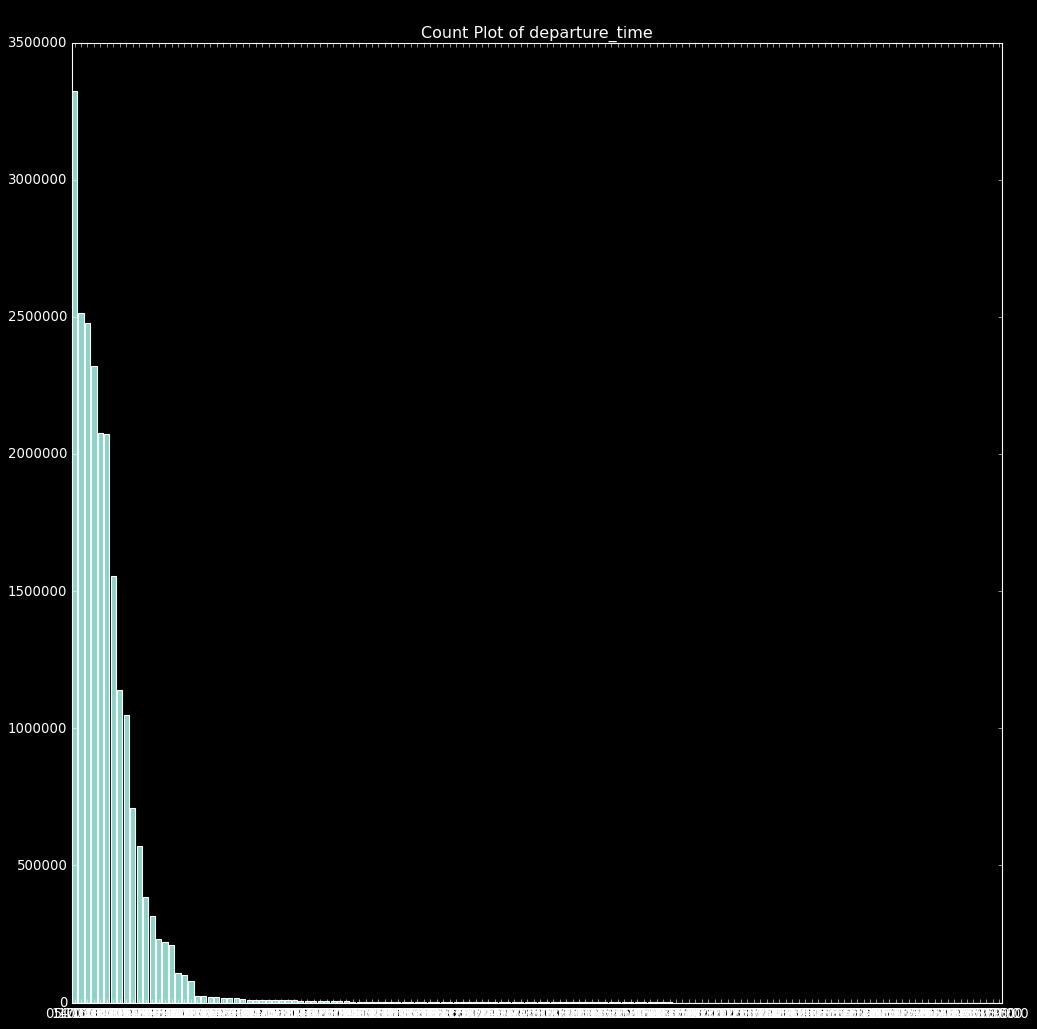

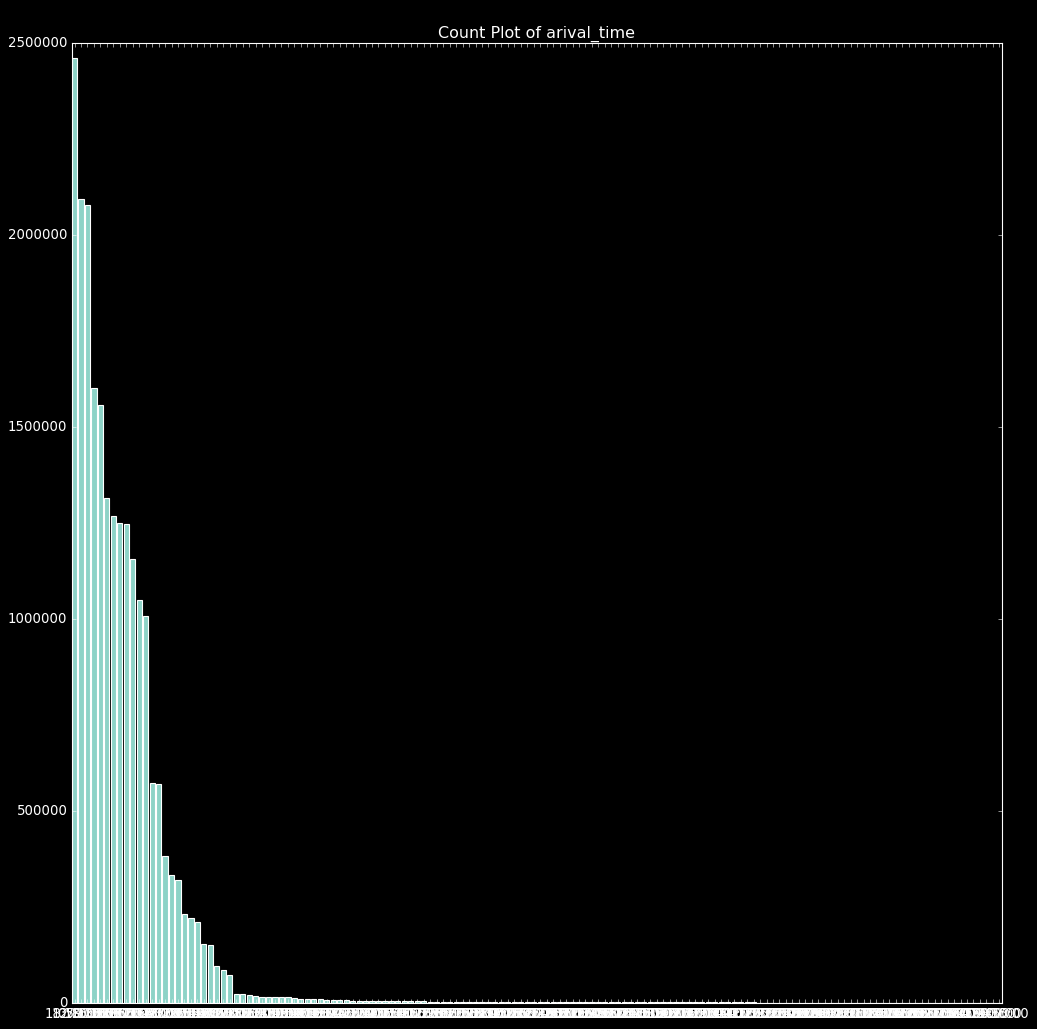

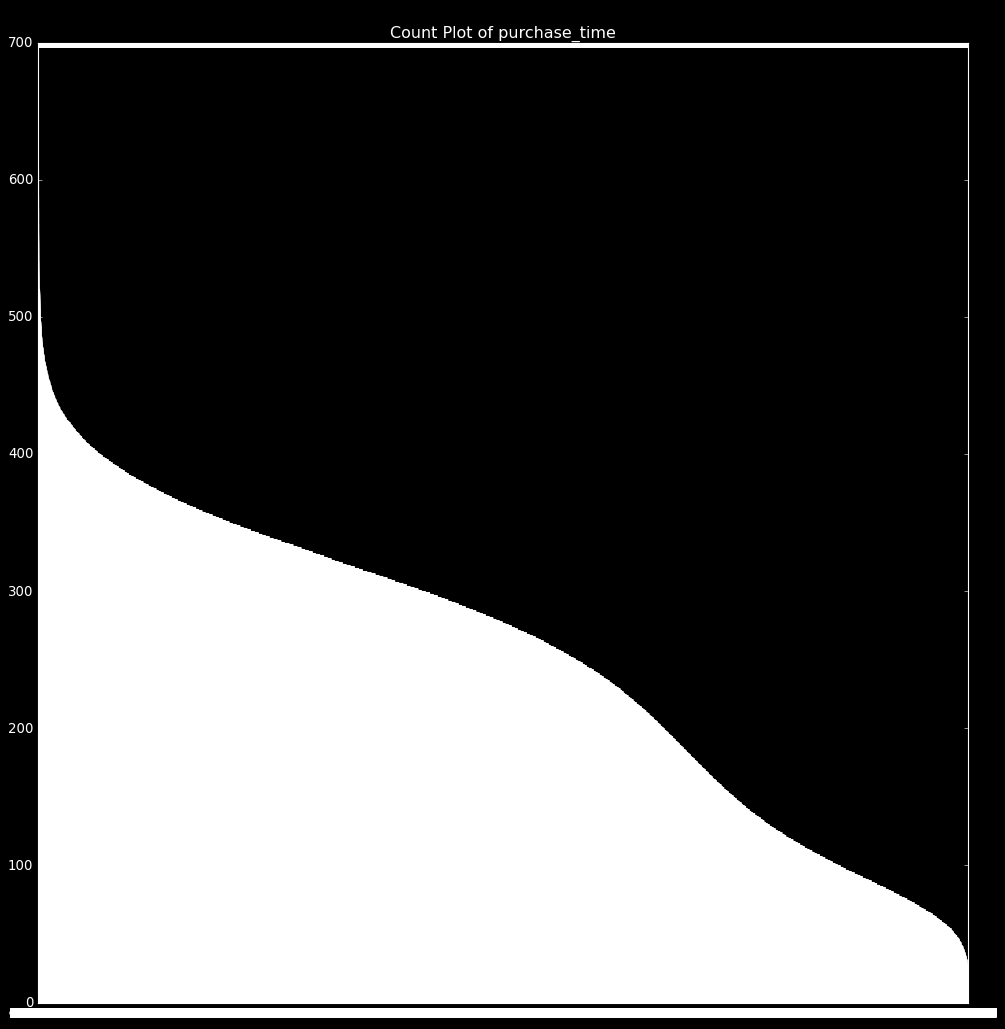

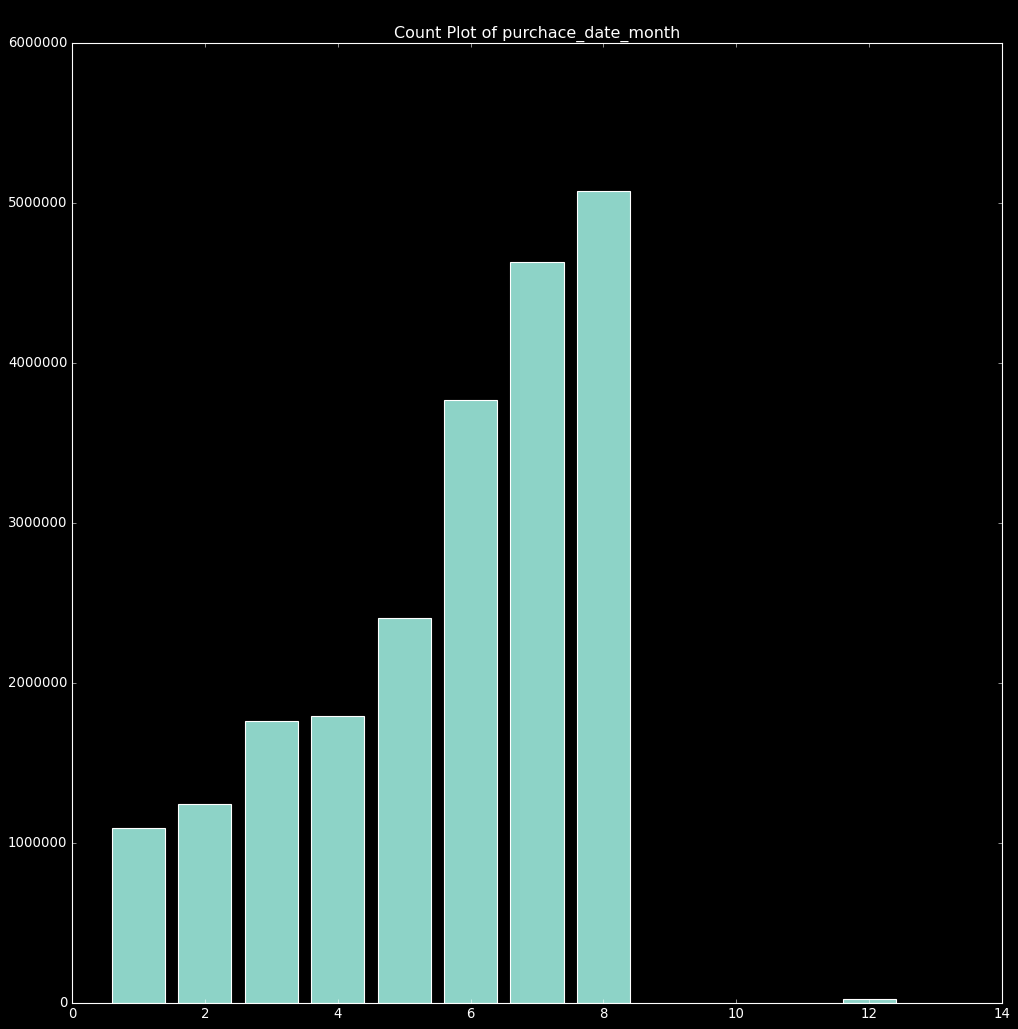

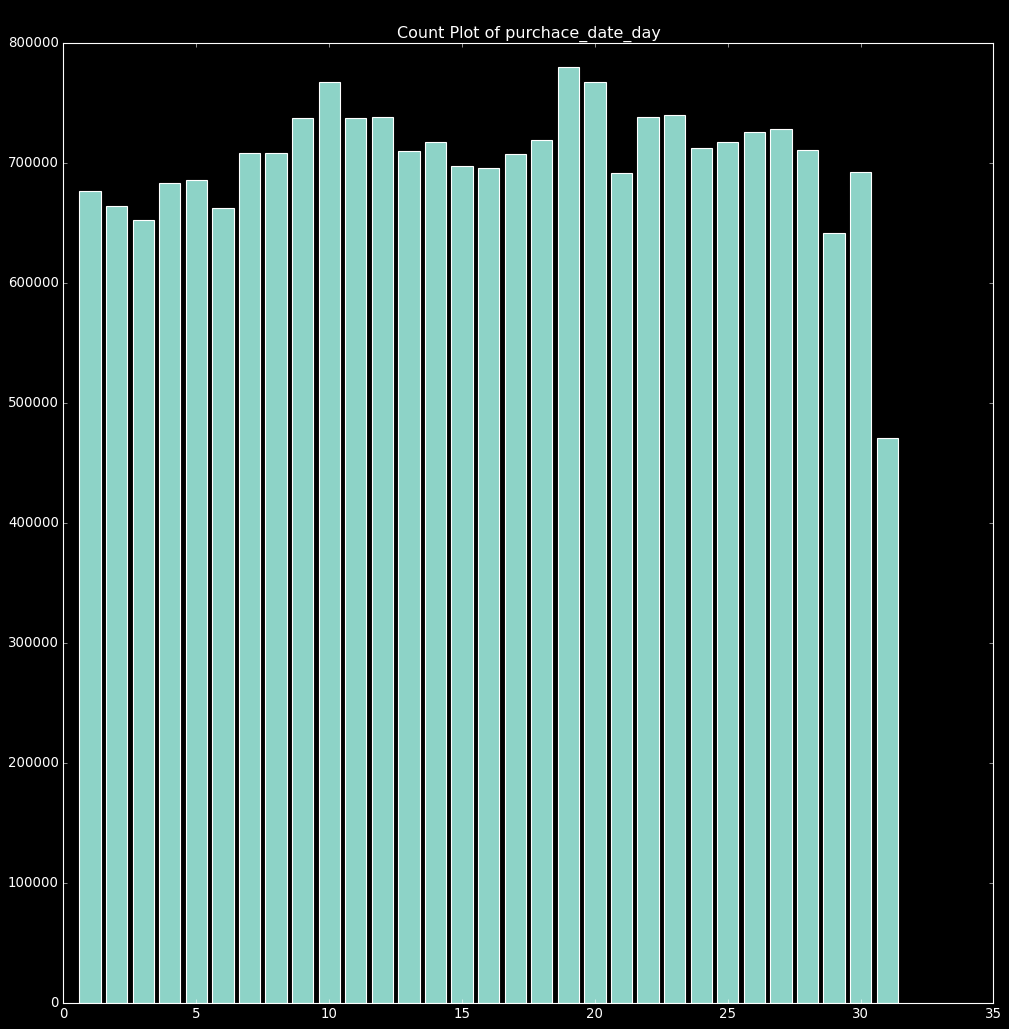

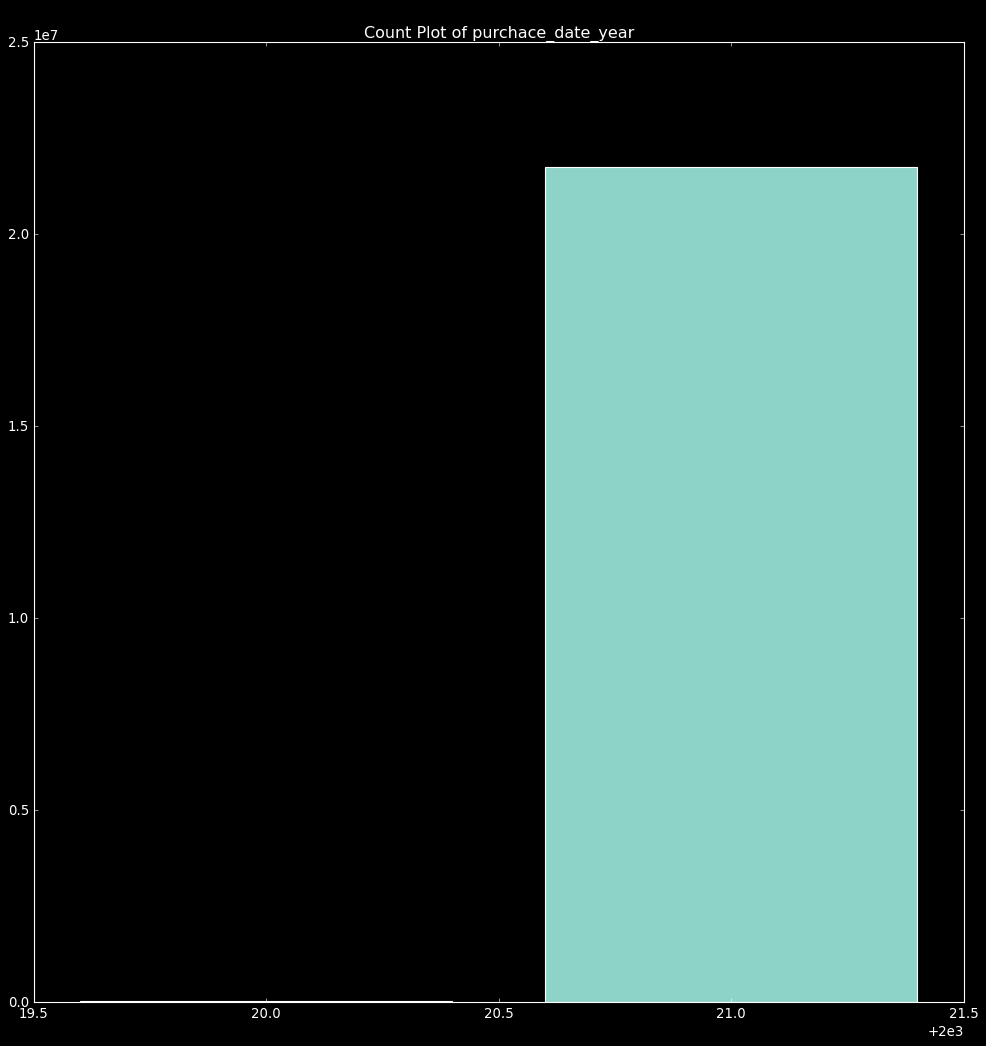

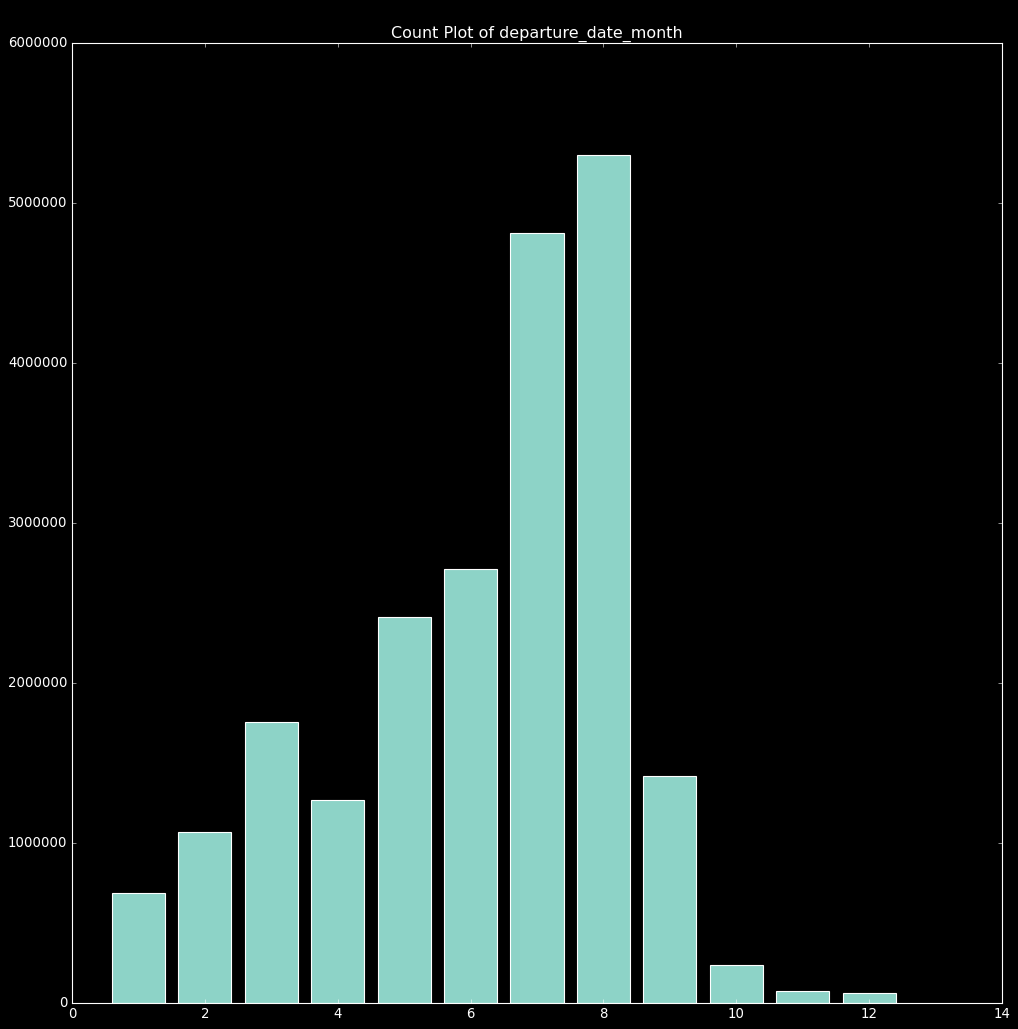

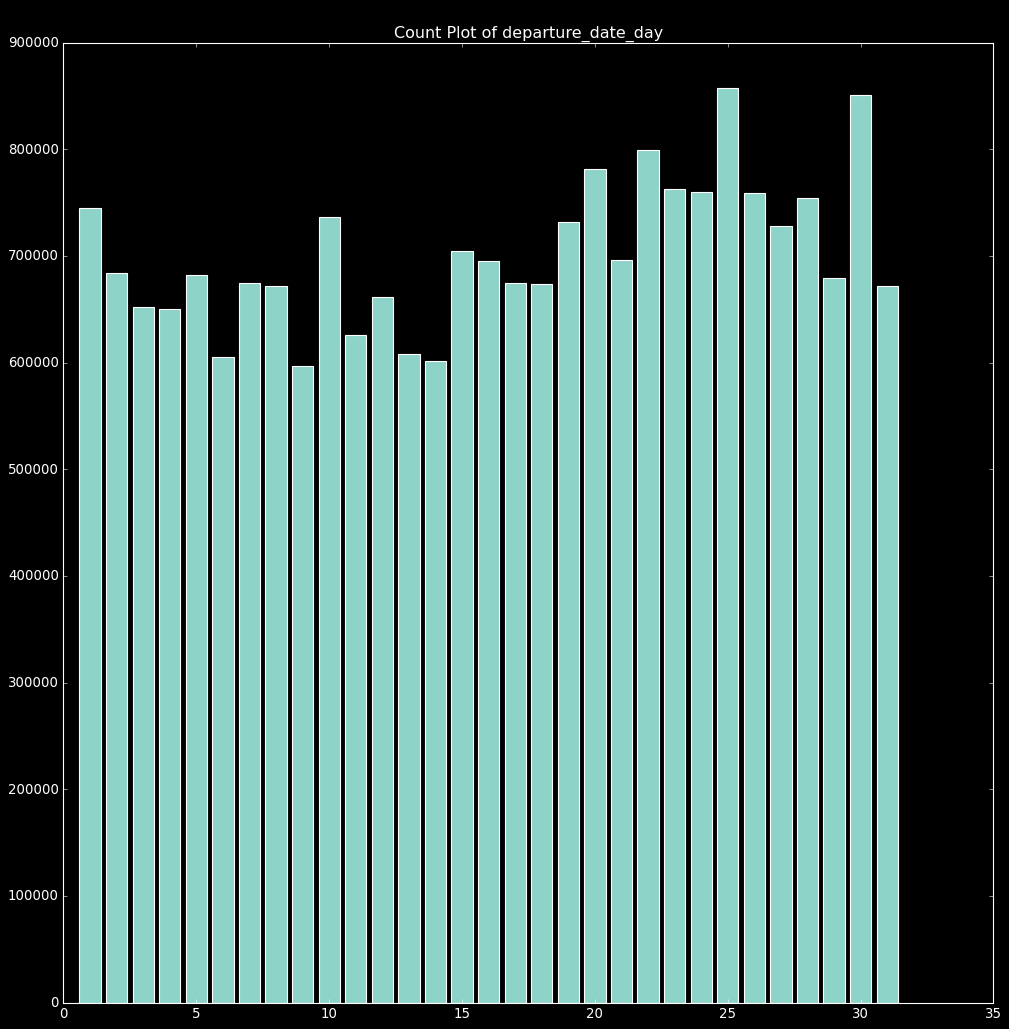

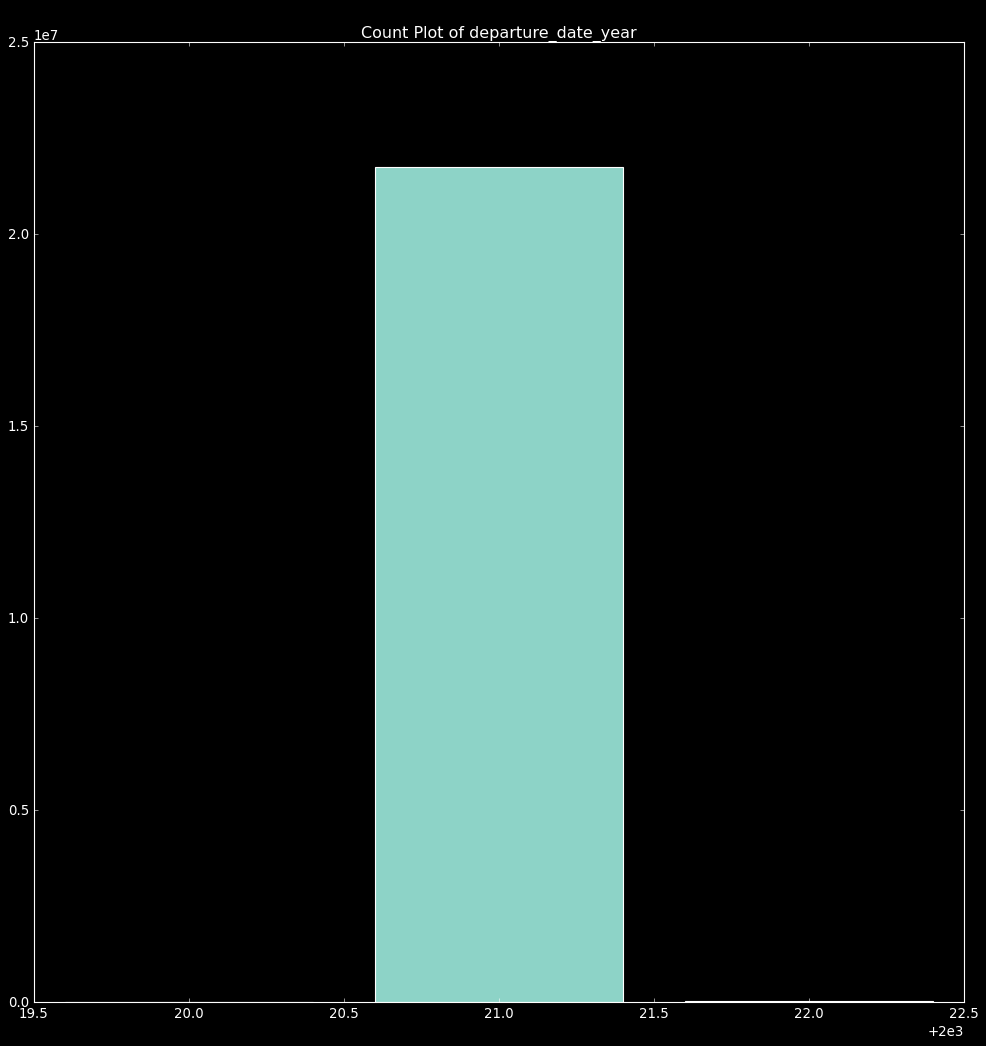

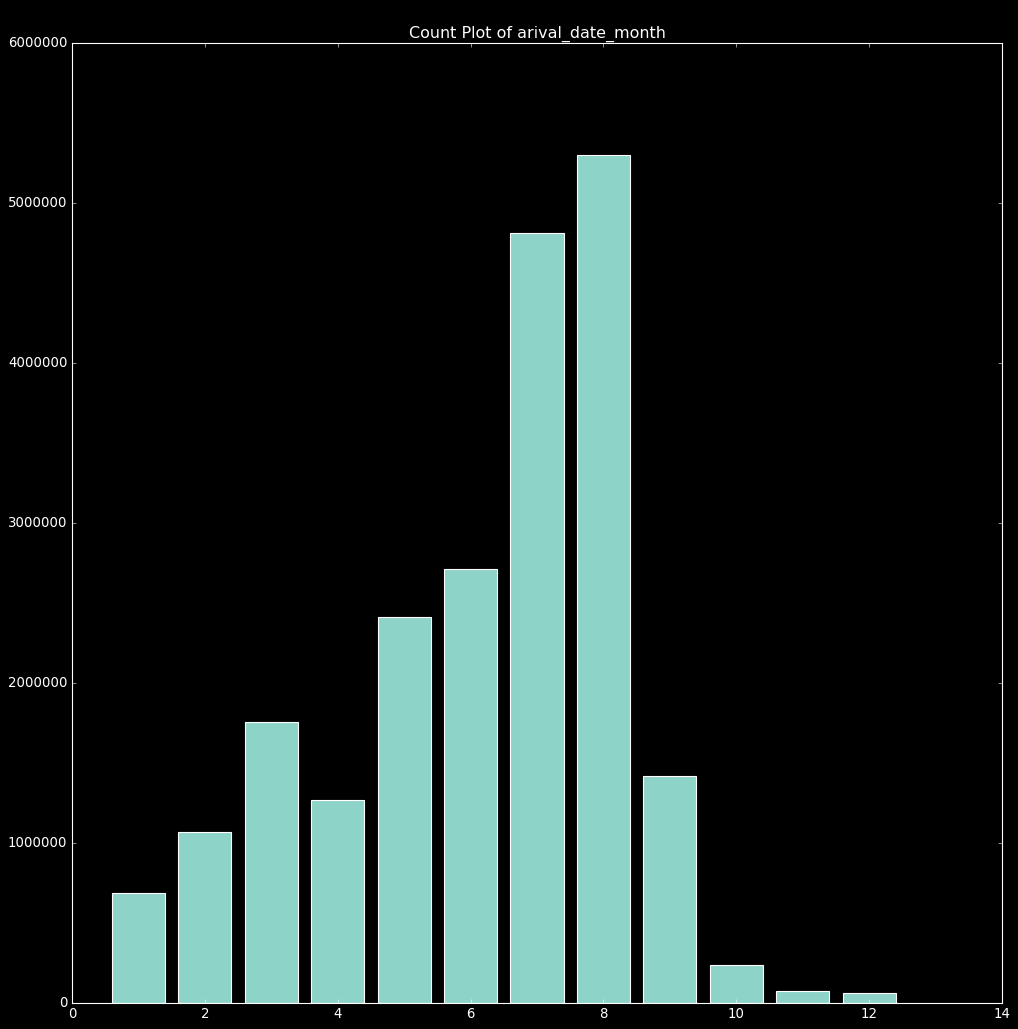

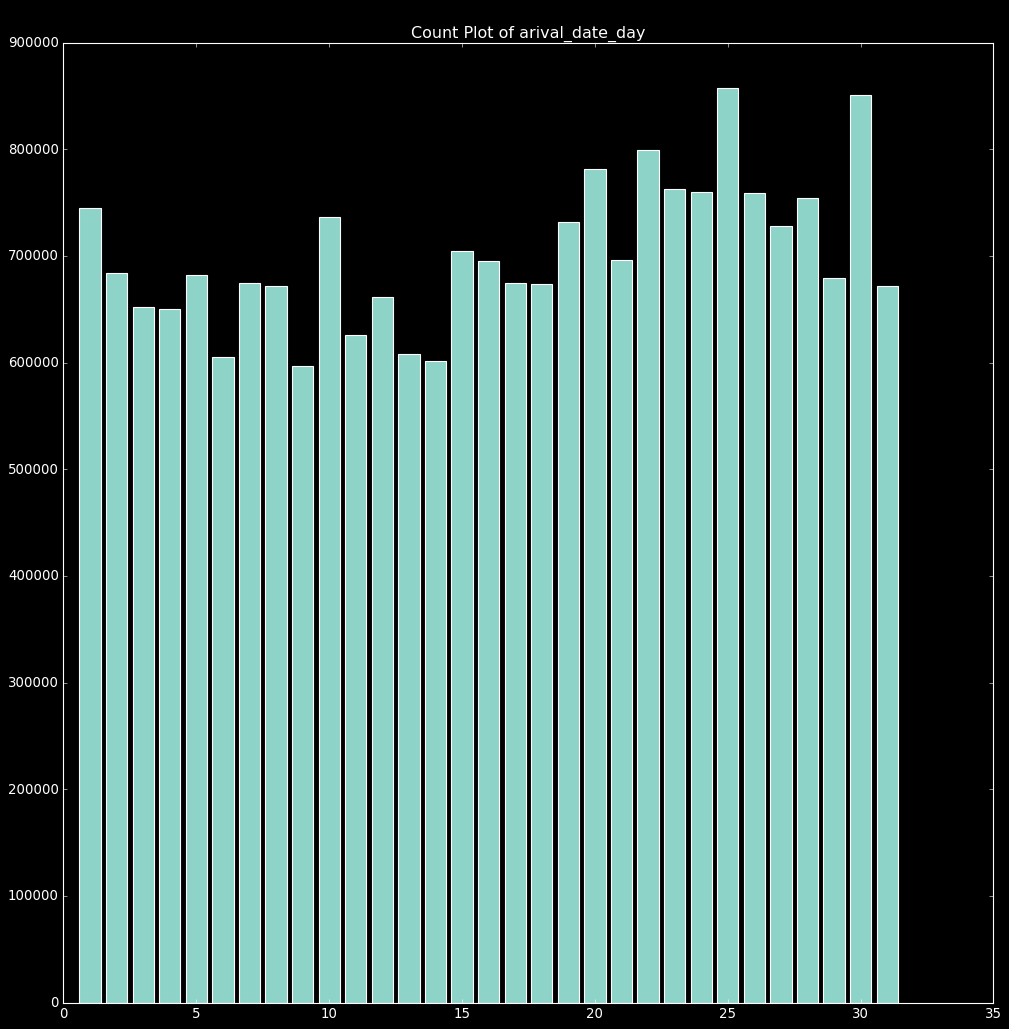

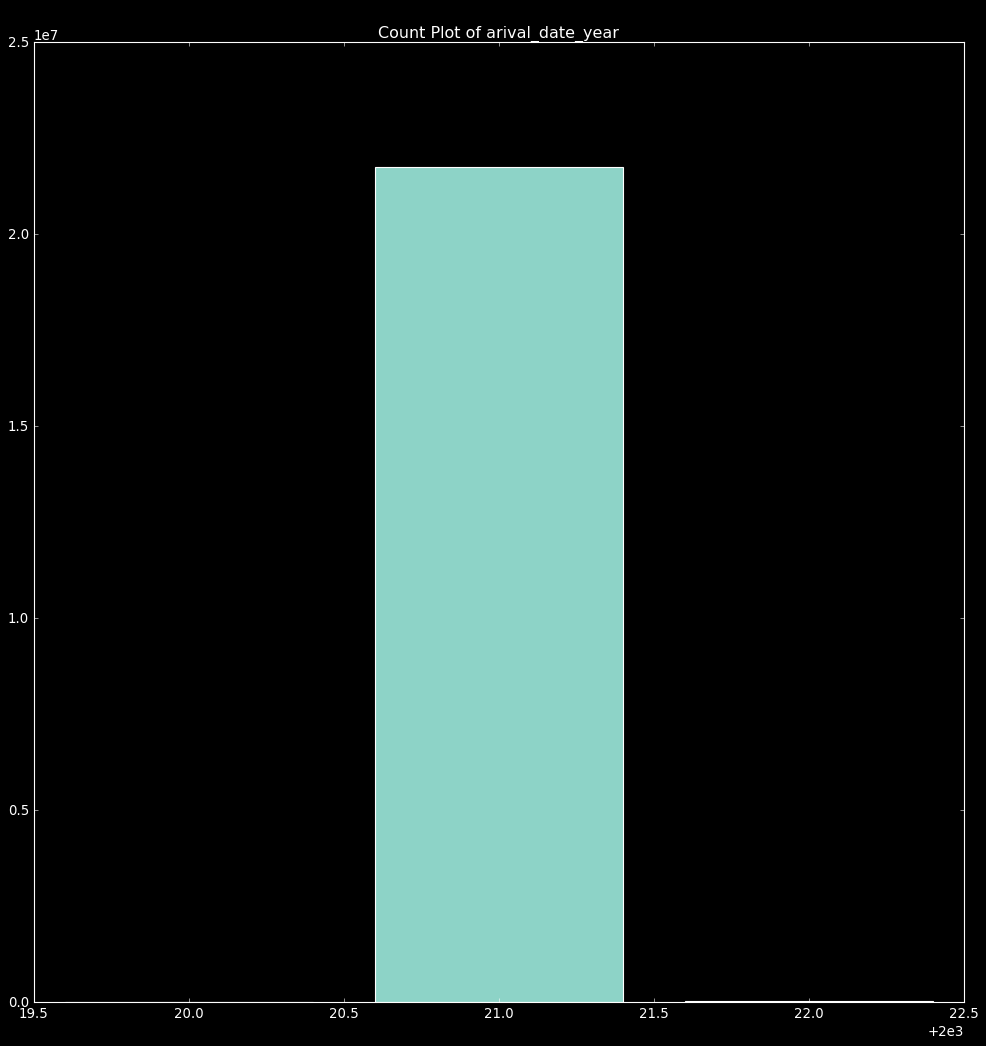

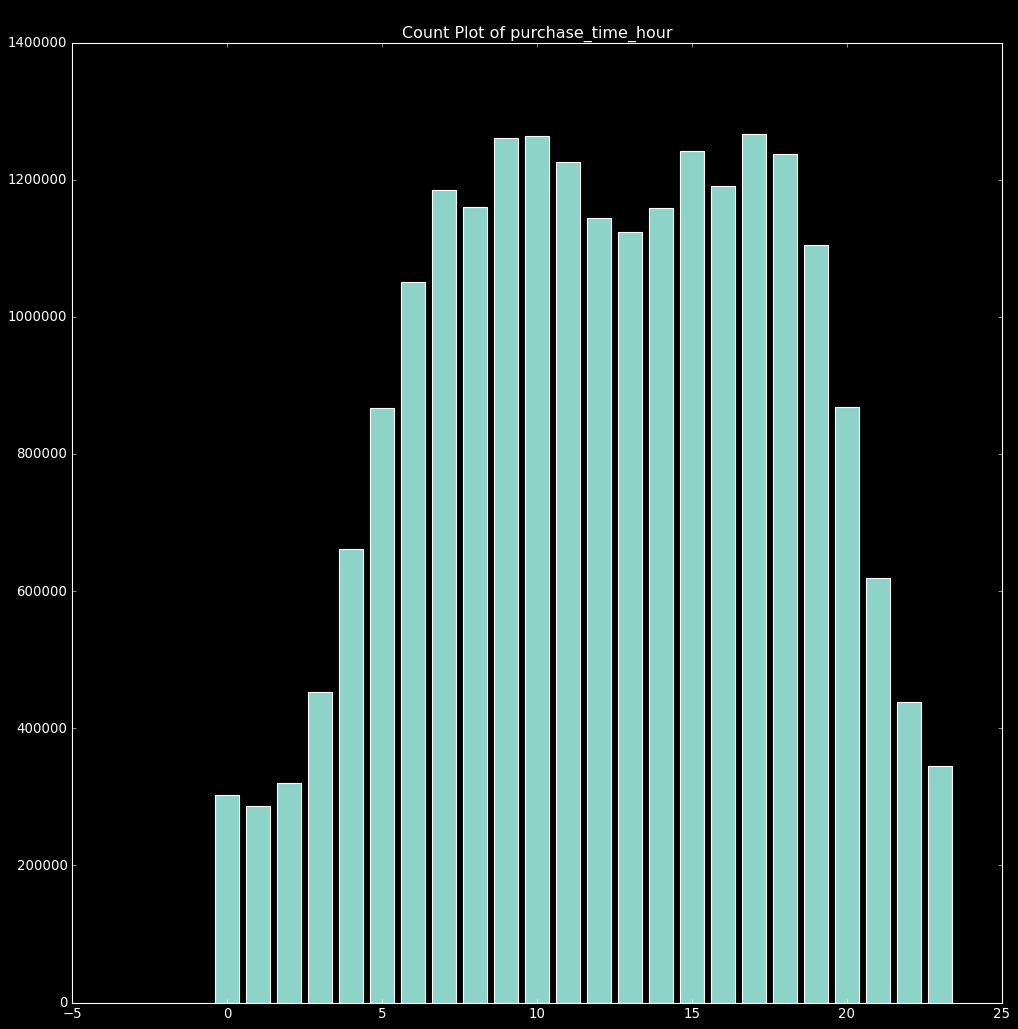

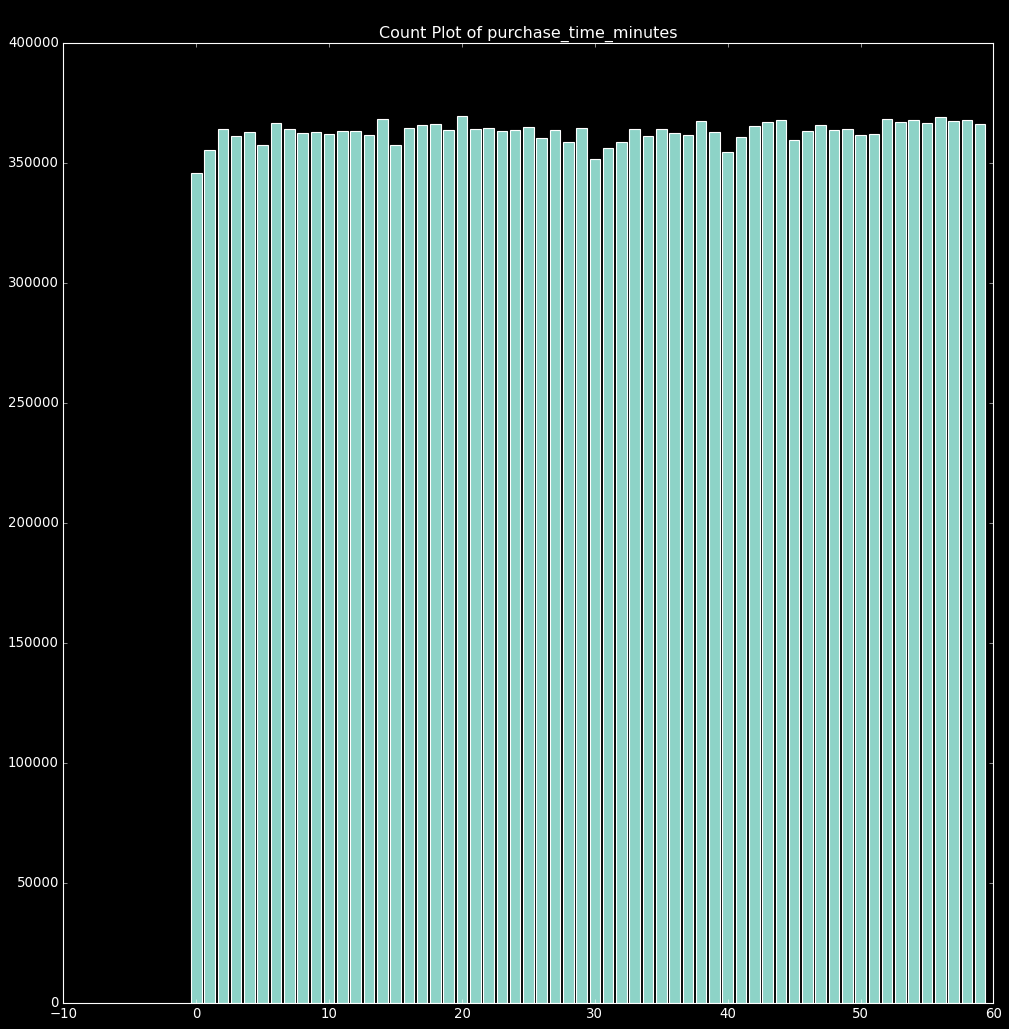

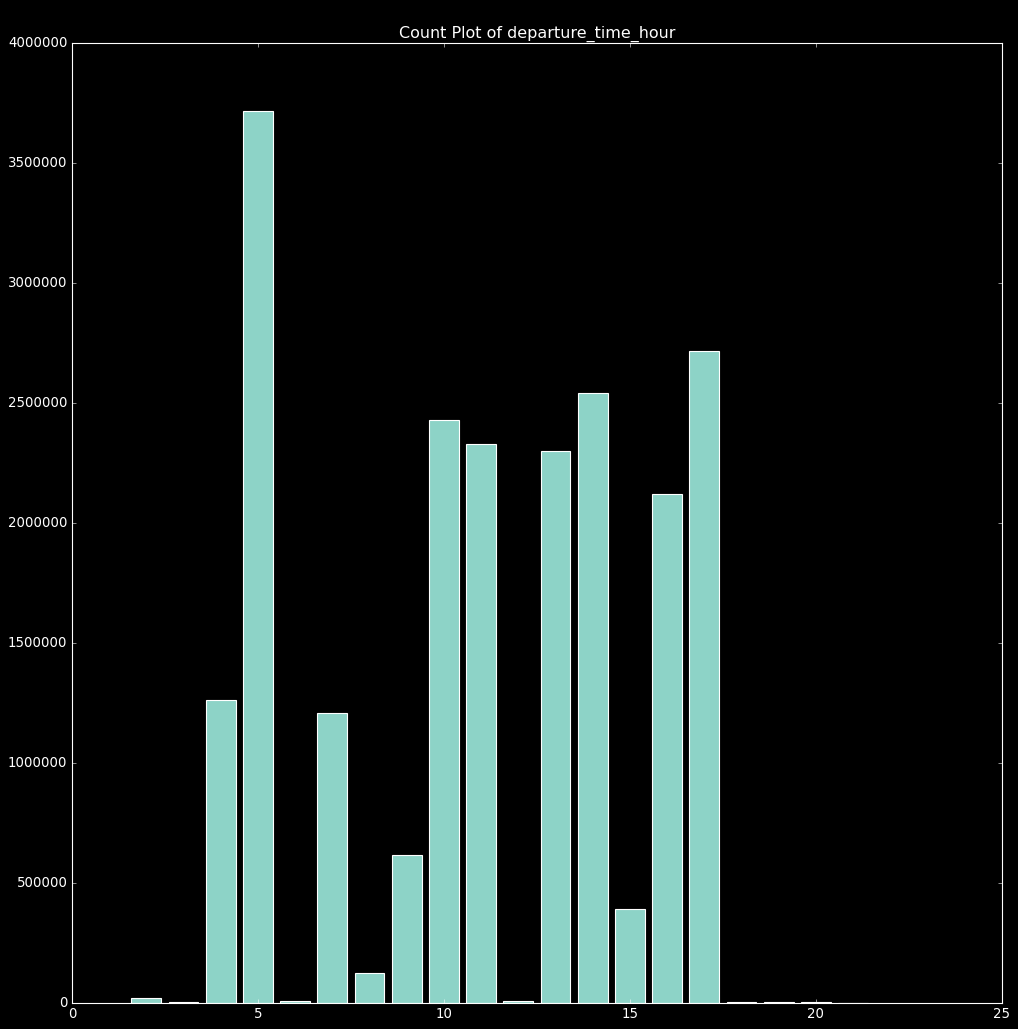

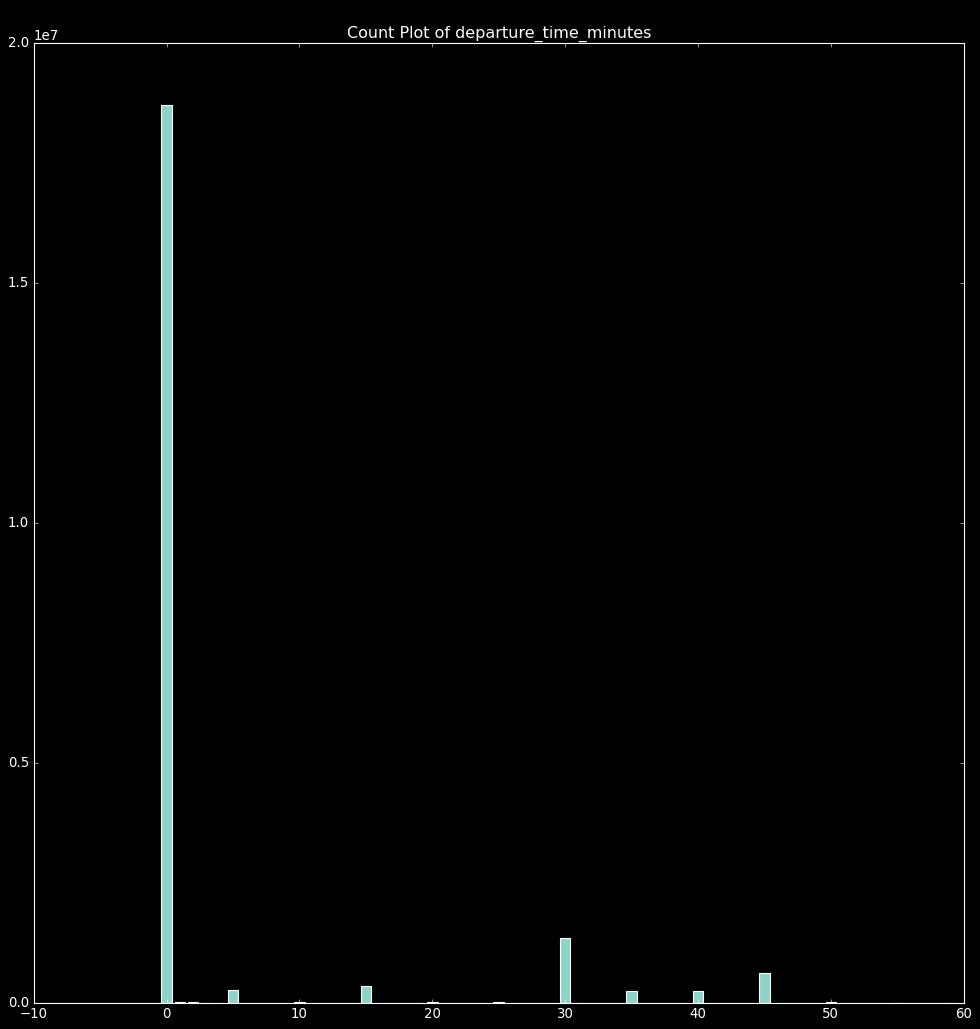

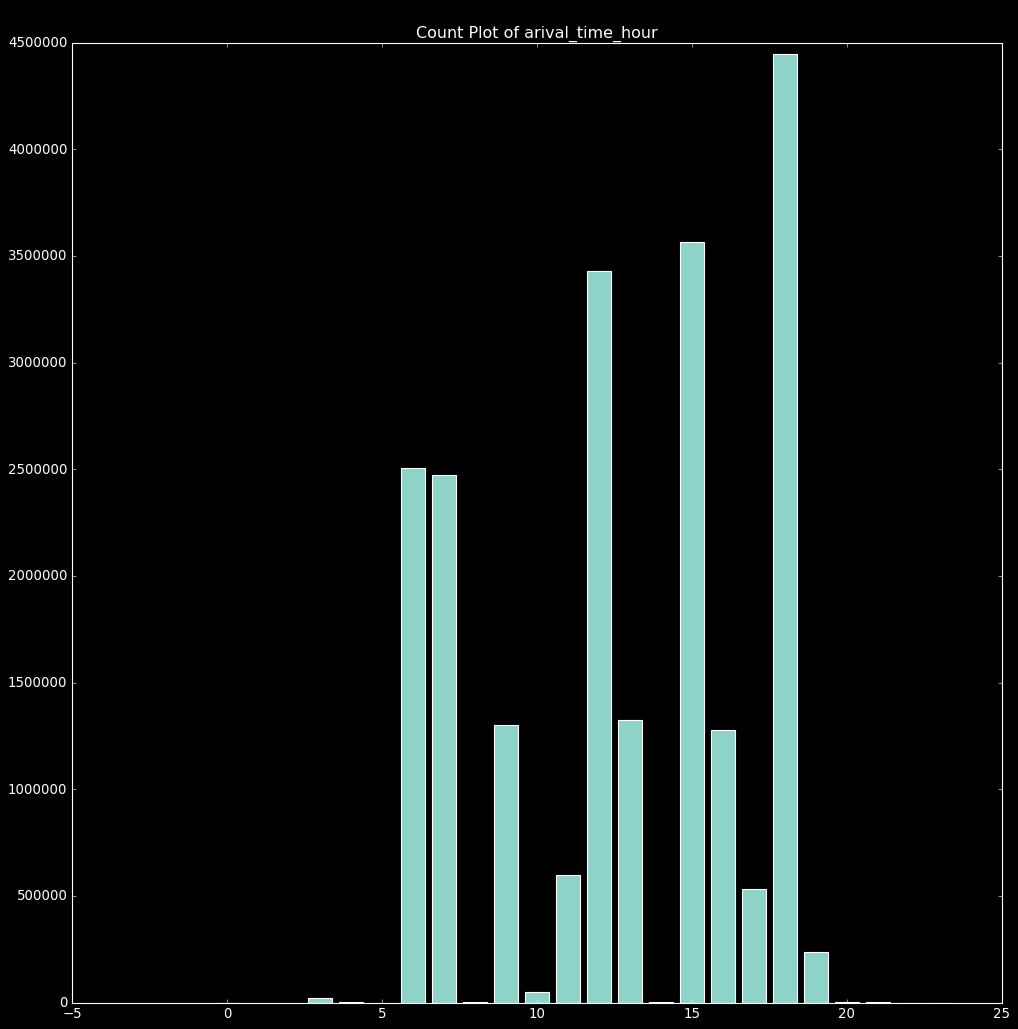

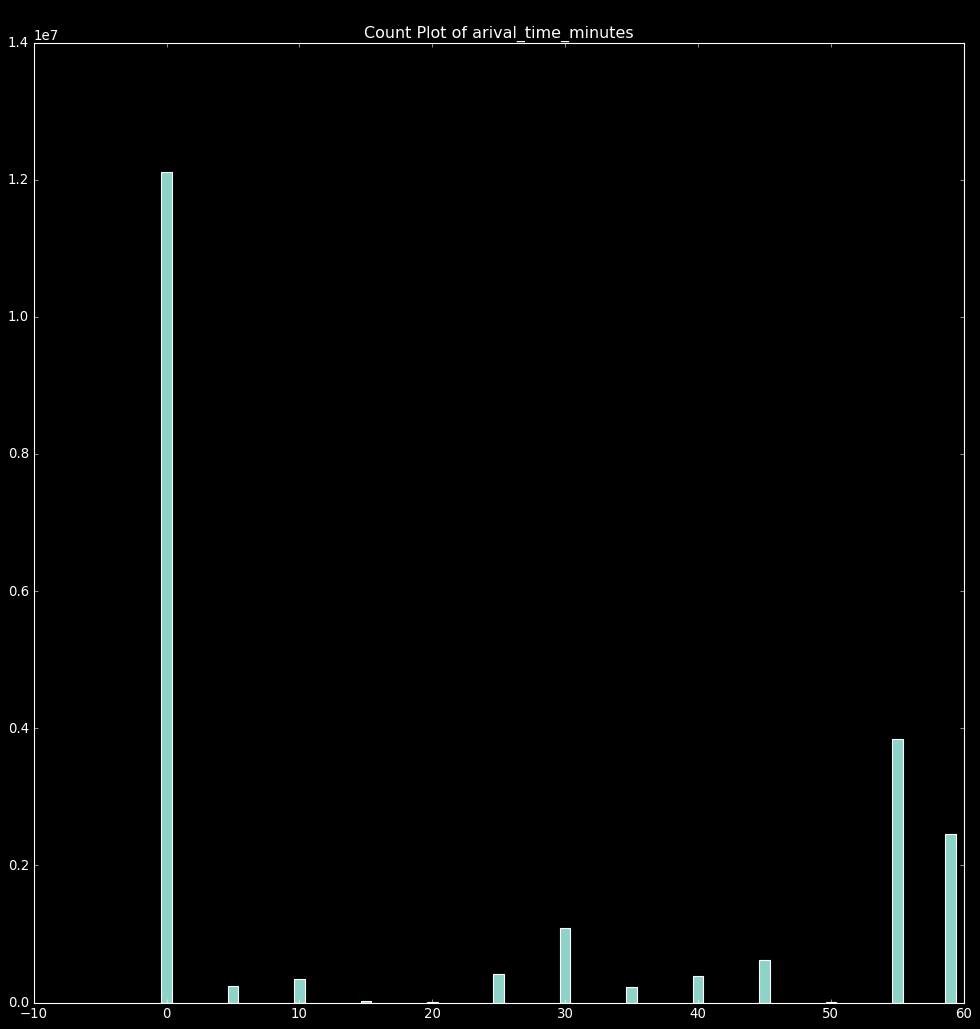

In [34]:
features = df.columns

for col in features:
    plt.style.use('dark_background')
    plt.figure(figsize=(15,15))
    plt.bar(list(df[col].value_counts().index),list(df[col].value_counts()))            
    plt.title('\nCount Plot of {}'.format(col))
    plt.show()

In [ ]:
x_val = list(set(df.columns) - set(['price']))
y_val = 'price'
for col in x_val:
    plt.style.use('dark_background')
    plt.figure(figsize=(15,15))
    plt.scatter(df[col],df['Price'],color=random.sample(['yellow','maroon','blue','pink'],1),linewidth = .5)
    plt.title('{} V/S {}'.format(col,y_val))
    plt.xlabel(col)
    plt.ylabel(y_val)
    plt.show()